In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("weather_data_imputed.csv")
df.head(2)

Station_Name  Latitude  Longitude  Elevation      Date  Year  \
0  ANURADHAPURA (METEO)      8.33      80.38       92.5  1/1/1970  1970   
1  ANURADHAPURA (METEO)      8.33      80.38       92.5  1/2/1970  1970   

   Month  Day  Precipitation_mm Flag  Nino3.4_SST    DMI  \
0      1    1               6.8  NaN    27.095648  0.297   
1      1    2               2.7  NaN    27.095648  0.297   

   Southern Oscillation Index  Sunspot_Number  U_Wind_850_Mean  \
0                      -1.256             163        -3.855421   
1                      -1.256             118        -4.491479   

   All_India_Monthly_Rainfall_mm  
0                           16.9  
1                           16.9

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Station_Name                   88883 non-null  object 
 1   Latitude                       88883 non-null  float64
 2   Longitude                      88883 non-null  float64
 3   Elevation                      88883 non-null  float64
 4   Date                           88883 non-null  object 
 5   Year                           88883 non-null  int64  
 6   Month                          88883 non-null  int64  
 7   Day                            88883 non-null  int64  
 8   Precipitation_mm               88883 non-null  float64
 9   Flag                           5205 non-null   object 
 10  Nino3.4_SST                    88883 non-null  float64
 11  DMI                            88883 non-null  float64
 12  Southern Oscillation Index     88883 non-null 

(88883, 16)

In [5]:
df.isnull().sum()

Station_Name                         0
Latitude                             0
Longitude                            0
Elevation                            0
Date                                 0
Year                                 0
Month                                0
Day                                  0
Precipitation_mm                     0
Flag                             83678
Nino3.4_SST                          0
DMI                                  0
Southern Oscillation Index           0
Sunspot_Number                       0
U_Wind_850_Mean                      0
All_India_Monthly_Rainfall_mm        0
dtype: int64

In [7]:
df[['Year', 'Month', 'Day']].head()


Year  Month  Day
0  1970      1    1
1  1970      1    2
2  1970      1    3
3  1970      1    4
4  1970      1    5

In [8]:
missing_rainfall_rows = df[df['Precipitation_mm'].isna()]
missing_rainfall_rows

Empty DataFrame
Columns: [Station_Name, Latitude, Longitude, Elevation, Date, Year, Month, Day, Precipitation_mm, Flag, Nino3.4_SST, DMI, Southern Oscillation Index, Sunspot_Number, U_Wind_850_Mean, All_India_Monthly_Rainfall_mm]
Index: []

In [9]:
dmi_All_India_Rainfall_monthly = (
    df[['Year', 'Month', 'DMI','All_India_Monthly_Rainfall_mm']]
    .drop_duplicates()
    .sort_values(['Year', 'Month'])
)
print(dmi_All_India_Rainfall_monthly)



       Year  Month    DMI  All_India_Monthly_Rainfall_mm
0      1970      1  0.297                           16.9
31     1970      2  0.326                           20.7
59     1970      3  0.068                           18.4
90     1970      4  0.219                           24.0
120    1970      5  0.182                           58.0
...     ...    ...    ...                            ...
10804  1999      8  0.023                          202.7
10835  1999      9 -0.050                          187.5
10865  1999     10 -0.190                          126.8
10896  1999     11 -0.116                           16.7
10926  1999     12 -0.148                            4.0

[360 rows x 4 columns]


In [10]:
dmi_All_India_Rainfall_monthly[['DMI', 'All_India_Monthly_Rainfall_mm']].describe()


DMI  All_India_Monthly_Rainfall_mm
count  360.000000                     360.000000
mean    -0.141025                      90.421111
std      0.354255                      93.927820
min     -1.108000                       0.800000
25%     -0.367000                      14.675000
50%     -0.156500                      44.000000
75%      0.066500                     159.500000
max      1.279000                     334.100000

In [11]:
df[['DMI', 'All_India_Monthly_Rainfall_mm']].isnull().sum()


DMI                              0
All_India_Monthly_Rainfall_mm    0
dtype: int64

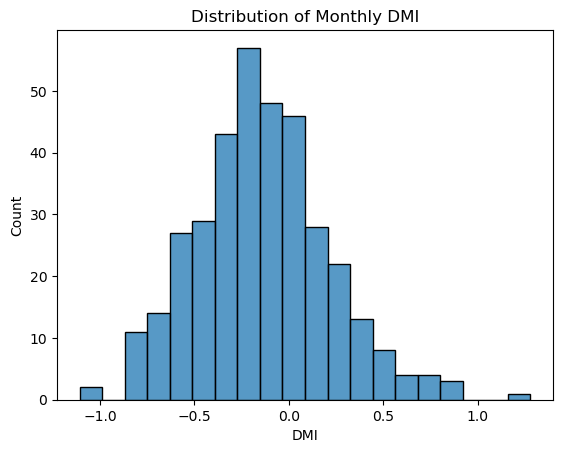

In [12]:
#only for 360
plt.figure()
sns.histplot(dmi_All_India_Rainfall_monthly['DMI'], bins=20)
plt.title("Distribution of Monthly DMI")
plt.xlabel("DMI")
plt.show()

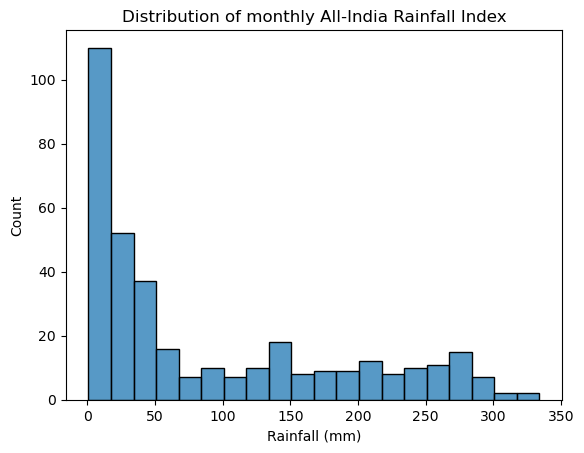

In [13]:
plt.figure()
sns.histplot(dmi_All_India_Rainfall_monthly['All_India_Monthly_Rainfall_mm'], bins=20)
plt.title("Distribution of monthly All-India Rainfall Index")
plt.xlabel("Rainfall (mm)")
plt.show()

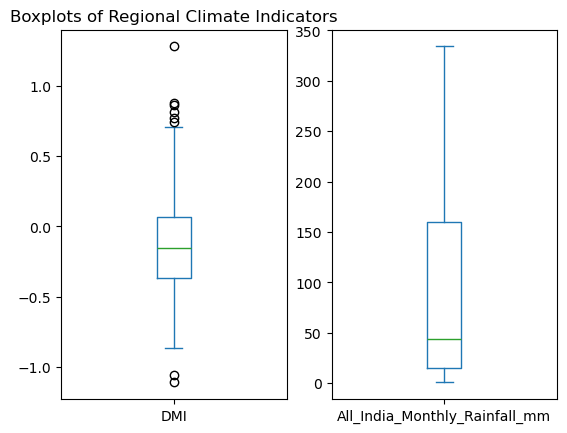

DMI


In [14]:
plt.figure()
plt.subplot(121)
dmi_All_India_Rainfall_monthly['DMI'].plot(kind='box')
plt.title("Boxplots of Regional Climate Indicators")
plt.subplot(122)
dmi_All_India_Rainfall_monthly['All_India_Monthly_Rainfall_mm'].plot(kind='box')
plt.show()
print('DMI')

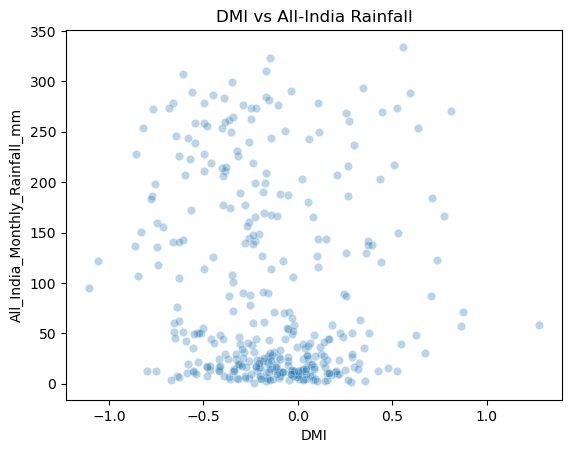

0        0.297
31       0.326
59       0.068
90       0.219
120      0.182
         ...  
10804    0.023
10835   -0.050
10865   -0.190
10896   -0.116
10926   -0.148
Name: DMI, Length: 360, dtype: float64


In [15]:
plt.figure()
sns.scatterplot(
    x=dmi_All_India_Rainfall_monthly['DMI'],
    y=dmi_All_India_Rainfall_monthly['All_India_Monthly_Rainfall_mm'],
    alpha=0.3
)
plt.title("DMI vs All-India Rainfall")
plt.show()
print(dmi_All_India_Rainfall_monthly['DMI'])

In [16]:
corr = dmi_All_India_Rainfall_monthly[['DMI',  'All_India_Monthly_Rainfall_mm']].corr()
corr

DMI  All_India_Monthly_Rainfall_mm
DMI                            1.000000                      -0.108006
All_India_Monthly_Rainfall_mm -0.108006                       1.000000

<h1>One DMI value per month, then plot Year vs DMI.</h1>


In [17]:
#STEP 1: Create a Year–Month DMI series (NO daily noise)
#We will keep only one DMI value per month.

dmi_monthly = (
    df[['Year', 'Month', 'DMI']]
    .drop_duplicates()
    .sort_values(['Year', 'Month'])
)
print(dmi_monthly)
dmi_monthly.shape

       Year  Month    DMI
0      1970      1  0.297
31     1970      2  0.326
59     1970      3  0.068
90     1970      4  0.219
120    1970      5  0.182
...     ...    ...    ...
10804  1999      8  0.023
10835  1999      9 -0.050
10865  1999     10 -0.190
10896  1999     11 -0.116
10926  1999     12 -0.148

[360 rows x 3 columns]


(360, 3)

In [18]:
dmi_monthly.head()


Year  Month    DMI
0    1970      1  0.297
31   1970      2  0.326
59   1970      3  0.068
90   1970      4  0.219
120  1970      5  0.182

In [19]:
#STEP 2: Create a proper time variable (for clean plotting)

dmi_monthly['YearMonth'] = pd.to_datetime(
    dmi_monthly['Year'].astype(str) + '-' +
    dmi_monthly['Month'].astype(str) + '-01'
)
dmi_monthly

Year  Month    DMI  YearMonth
0      1970      1  0.297 1970-01-01
31     1970      2  0.326 1970-02-01
59     1970      3  0.068 1970-03-01
90     1970      4  0.219 1970-04-01
120    1970      5  0.182 1970-05-01
...     ...    ...    ...        ...
10804  1999      8  0.023 1999-08-01
10835  1999      9 -0.050 1999-09-01
10865  1999     10 -0.190 1999-10-01
10896  1999     11 -0.116 1999-11-01
10926  1999     12 -0.148 1999-12-01

[360 rows x 4 columns]

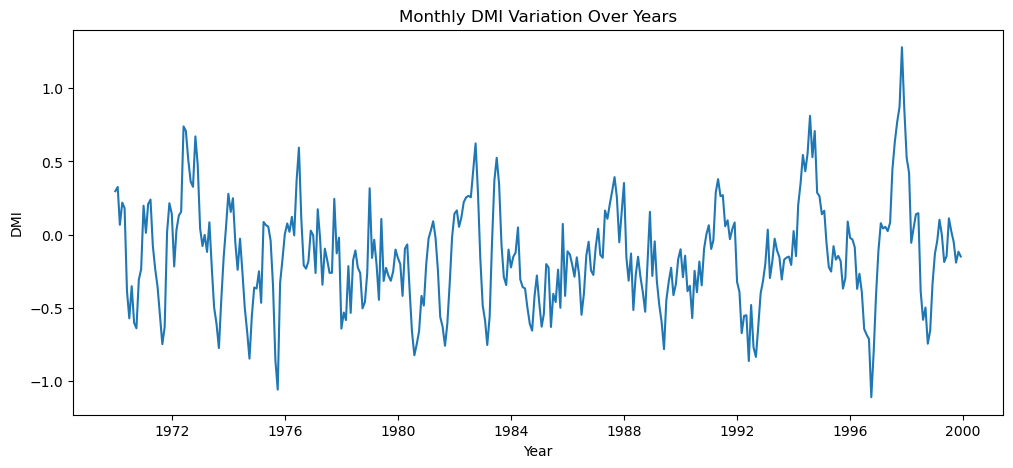

In [20]:
#STEP 3: Plot DMI variation over years (CLEAR visualization)

plt.figure(figsize=(12,5))
plt.plot(dmi_monthly['YearMonth'], dmi_monthly['DMI'])
plt.title("Monthly DMI Variation Over Years")
plt.xlabel("Year")
plt.ylabel("DMI")
plt.show()


In [21]:
#Pivot Table (Year × Month)
#table where rows = Year and columns = Month, and each cell = DMI. 
#This makes it easy to see monthly variation for each year numerically.
dmi_pivot = dmi_monthly.pivot(index='Year', columns='Month', values='DMI')
print(dmi_pivot)


Month     1      2      3      4      5      6      7      8      9      10  \
Year                                                                          
1970   0.297  0.326  0.068  0.219  0.182 -0.385 -0.570 -0.351 -0.600 -0.638   
1971   0.198  0.013  0.208  0.240 -0.074 -0.236 -0.354 -0.547 -0.746 -0.629   
1972   0.143 -0.216  0.031  0.131  0.157  0.739  0.708  0.511  0.363  0.327   
1973   0.043 -0.077 -0.001 -0.117  0.085 -0.225 -0.495 -0.607 -0.773 -0.449   
1974   0.279  0.156  0.249 -0.053 -0.239 -0.027 -0.249 -0.497 -0.661 -0.845   
1975  -0.367 -0.249 -0.464  0.087  0.066  0.055 -0.039 -0.344 -0.857 -1.056   
1976   0.005  0.077  0.020  0.122 -0.004  0.369  0.594  0.107 -0.208 -0.231   
1977  -0.003 -0.261  0.174 -0.029 -0.341 -0.095 -0.171 -0.260 -0.259  0.245   
1978  -0.640 -0.530 -0.582 -0.214 -0.533 -0.174 -0.107 -0.224 -0.261 -0.502   
1979   0.317 -0.158 -0.034 -0.207 -0.444  0.108 -0.315 -0.226 -0.280 -0.314   
1980  -0.158 -0.200 -0.417 -0.095 -0.066 -0.382 -0.6

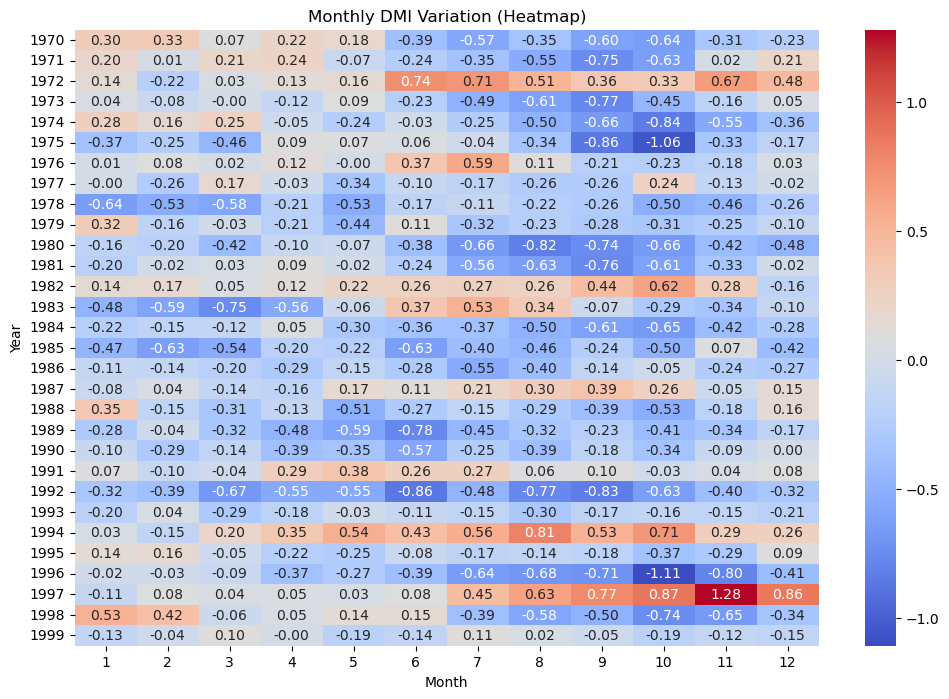

In [22]:
#Heatmap (Year × Month)
#This is basically a visual version of the table. Brightness/color shows DMI intensity. Very clear for seeing seasonal patterns.

plt.figure(figsize=(12,8))
sns.heatmap(dmi_pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Monthly DMI Variation (Heatmap)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

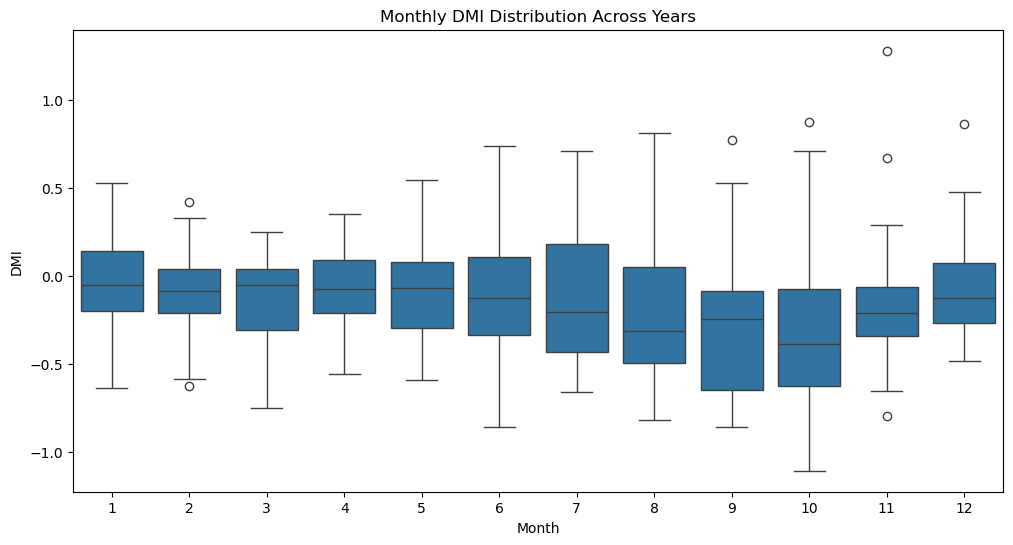

In [23]:
#Boxplot (Month-wise Distribution)
#to see DMI distribution for each month across all years, use a boxplot

plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='DMI', data=dmi_monthly)
plt.title("Monthly DMI Distribution Across Years")
plt.xlabel("Month")
plt.ylabel("DMI")
plt.show()

#Each box shows median, quartiles, and outliers for that month across years.
#Helps identify which months have high/low DMI generally.

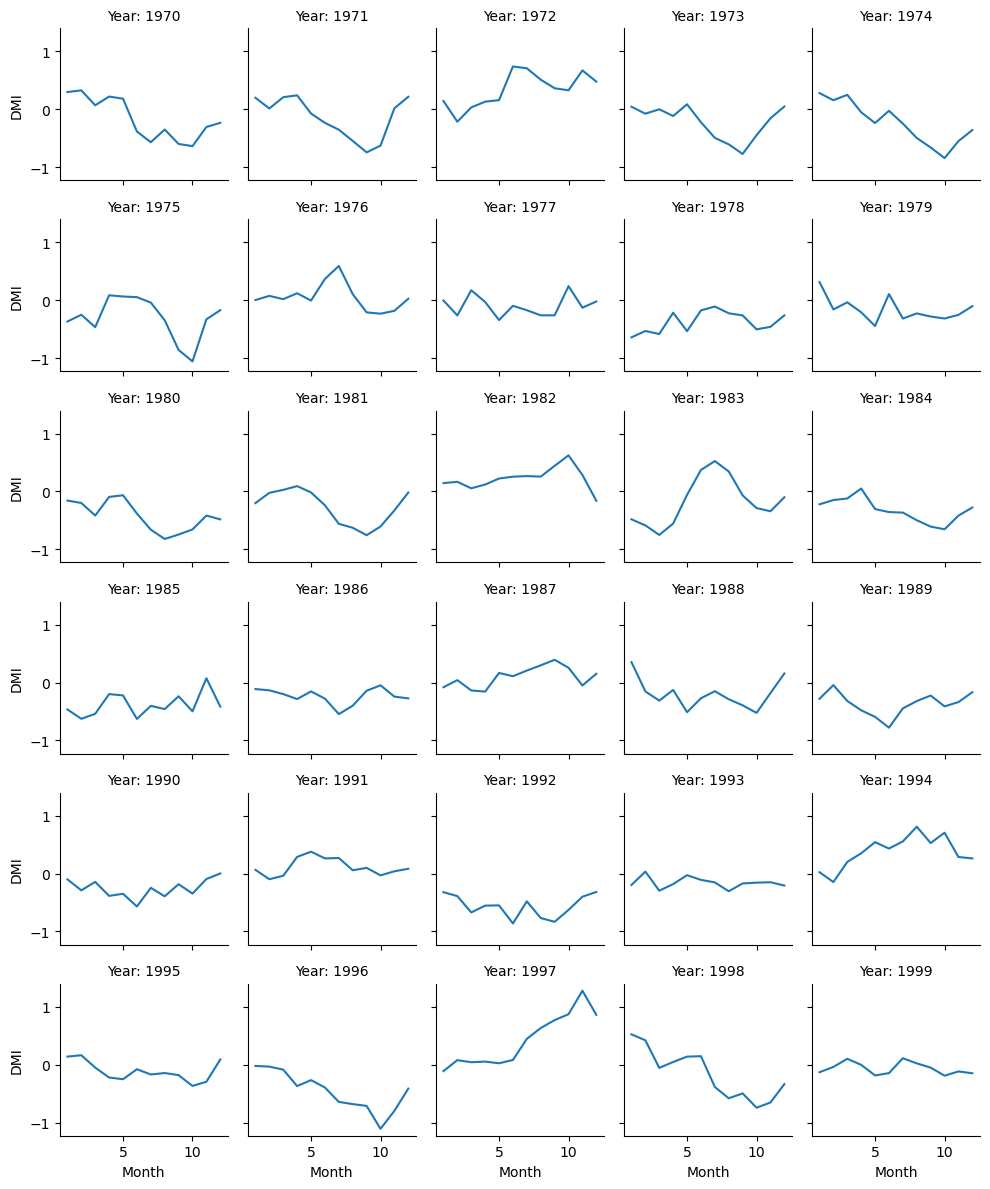

In [24]:
#FacetGrid / Small Multiples
#one subplot per year with 12 points (months).  lines for each year separately.
g = sns.FacetGrid(dmi_monthly, col="Year", col_wrap=5, height=2)
g.map(plt.plot, "Month", "DMI")
g.set_titles("Year: {col_name}")
g.set_axis_labels("Month", "DMI")
plt.show()


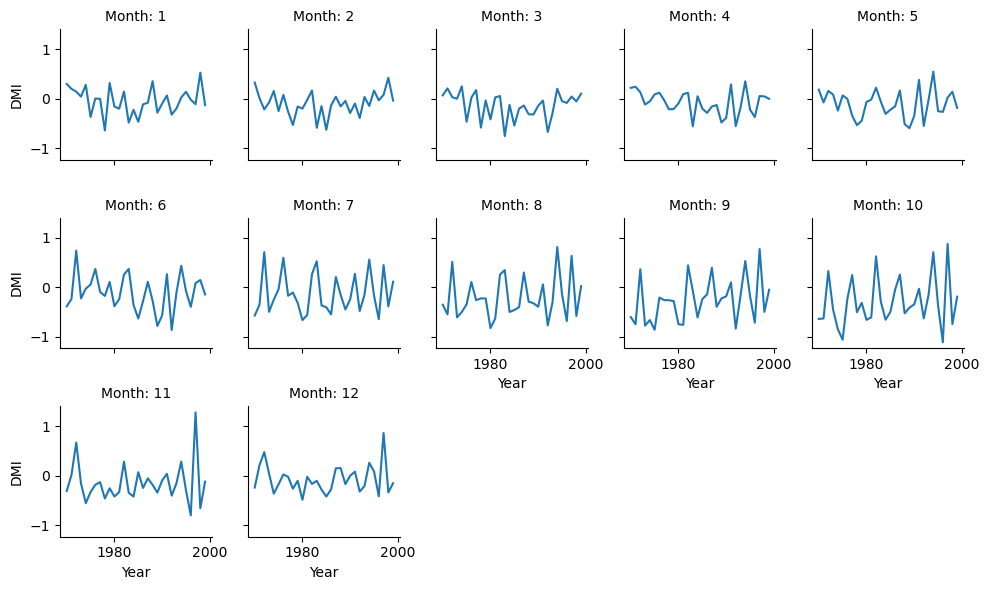

In [25]:
#FacetGrid / Small Multiples
#one subplot per year with 12 points (months).  lines for each year separately.
g = sns.FacetGrid(dmi_monthly, col="Month", col_wrap=5, height=2)
g.map(plt.plot, "Year", "DMI")
g.set_titles("Month: {col_name}")
g.set_axis_labels("Year", "DMI")
plt.show()

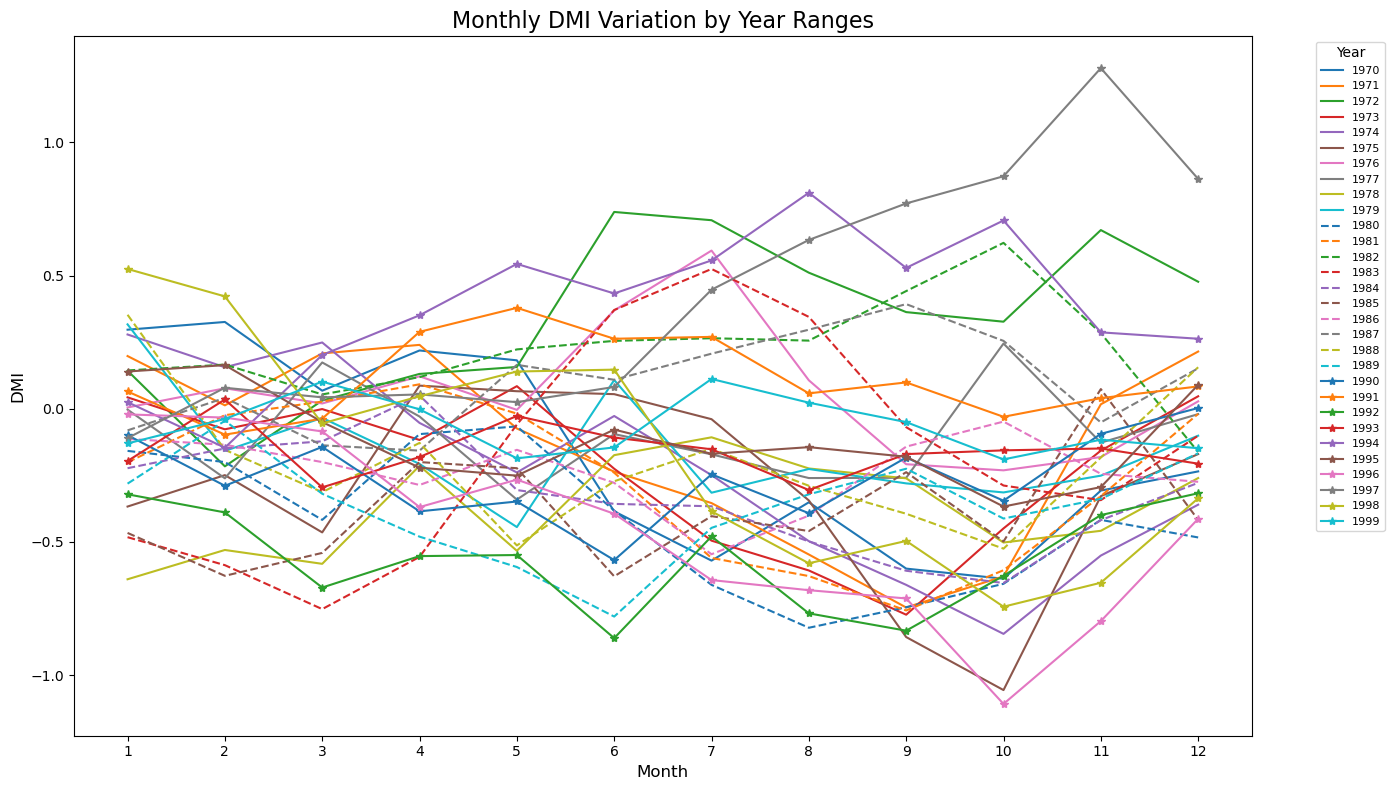

In [26]:
#group years into ranges and use different line styles
plt.figure(figsize=(14,8))

# Loop through each year and assign line style based on year range
for year in dmi_pivot.index:
    if 1970 <= year < 1980:
        style = '-'        # solid line
    elif 1980 <= year < 1990:
        style = '--'       # dashed line
    elif 1990 <= year < 2000:
        style = '*-'       # star markers with line
    else:
        style = ':'        # dotted line for other years

    plt.plot(dmi_pivot.columns, dmi_pivot.loc[year], style, label=str(year))

plt.title("Monthly DMI Variation by Year Ranges", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("DMI", fontsize=12)
plt.xticks(dmi_pivot.columns)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, ncol=1)
plt.tight_layout()
plt.show()

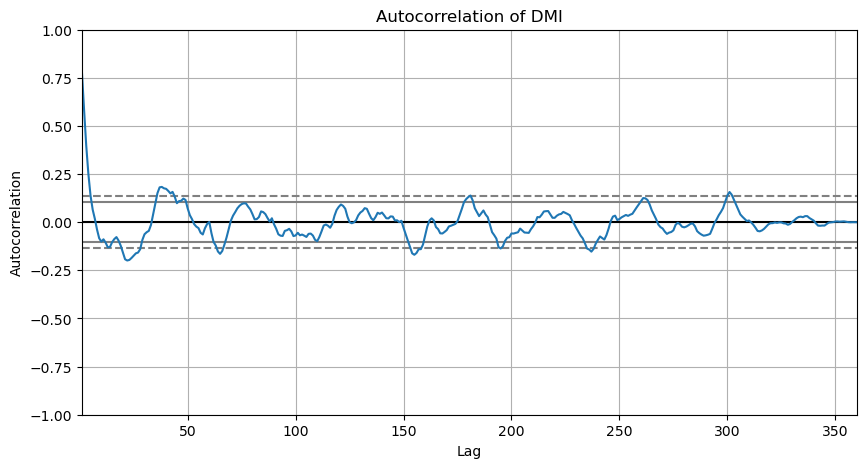

In [28]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10,5))
autocorrelation_plot(dmi_monthly['DMI'])
plt.title("Autocorrelation of DMI")
plt.show()

<h1>All_India_Monthly_Rainfall_mm</h1>

In [29]:
#STEP 1: Create a Year–Month All_India_Monthly_Rainfall_mm series (NO daily noise)
#We will keep only one Rainfall_mm value per month.

India_Rainfall_monthly = (
    df[['Year', 'Month', 'All_India_Monthly_Rainfall_mm']]
    .drop_duplicates()
    .sort_values(['Year', 'Month'])
)
print(India_Rainfall_monthly)
India_Rainfall_monthly.shape

       Year  Month  All_India_Monthly_Rainfall_mm
0      1970      1                           16.9
31     1970      2                           20.7
59     1970      3                           18.4
90     1970      4                           24.0
120    1970      5                           58.0
...     ...    ...                            ...
10804  1999      8                          202.7
10835  1999      9                          187.5
10865  1999     10                          126.8
10896  1999     11                           16.7
10926  1999     12                            4.0

[360 rows x 3 columns]


(360, 3)

In [30]:
#STEP 2: Create a proper time variable (for clean plotting)

India_Rainfall_monthly['YearMonth'] = pd.to_datetime(
    India_Rainfall_monthly['Year'].astype(str) + '-' +
    India_Rainfall_monthly['Month'].astype(str) + '-01'
)
India_Rainfall_monthly

Year  Month  All_India_Monthly_Rainfall_mm  YearMonth
0      1970      1                           16.9 1970-01-01
31     1970      2                           20.7 1970-02-01
59     1970      3                           18.4 1970-03-01
90     1970      4                           24.0 1970-04-01
120    1970      5                           58.0 1970-05-01
...     ...    ...                            ...        ...
10804  1999      8                          202.7 1999-08-01
10835  1999      9                          187.5 1999-09-01
10865  1999     10                          126.8 1999-10-01
10896  1999     11                           16.7 1999-11-01
10926  1999     12                            4.0 1999-12-01

[360 rows x 4 columns]

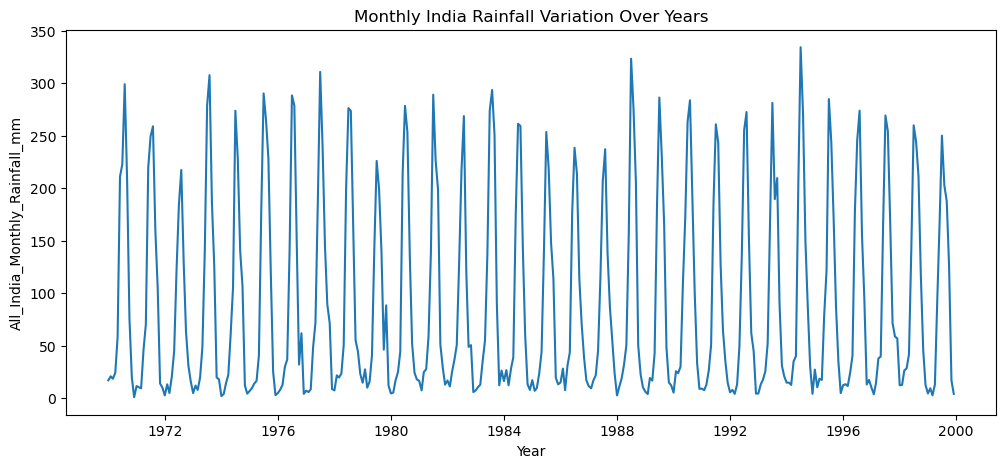

In [31]:
#STEP 3: Plot All_India_Monthly_Rainfall_mm variation over years (CLEAR visualization)

plt.figure(figsize=(12,5))
plt.plot(India_Rainfall_monthly['YearMonth'], India_Rainfall_monthly['All_India_Monthly_Rainfall_mm'])
plt.title("Monthly India Rainfall Variation Over Years")
plt.xlabel("Year")
plt.ylabel("All_India_Monthly_Rainfall_mm")
plt.show()

In [32]:
#Pivot Table (Year × Month)
#table where rows = Year and columns = Month, and each cell = All_India_Monthly_Rainfall_mm. 
#This makes it easy to see monthly variation for each year numerically.
India_Rainfall_monthly_pivot = India_Rainfall_monthly.pivot(index='Year', columns='Month', values='All_India_Monthly_Rainfall_mm')
print(India_Rainfall_monthly_pivot)

Month    1     2     3     4      5      6      7      8      9      10    11  \
Year                                                                            
1970   16.9  20.7  18.4  24.0   58.0  210.8  222.8  298.9  207.3   76.2  19.4   
1971   11.4  10.3   9.3  46.0   70.2  219.4  249.3  258.8  159.3  105.2  13.8   
1972    2.5  13.1   4.8  20.6   44.8  122.6  183.8  217.2  129.2   63.3  30.8   
1973    4.7  11.9   7.8  19.5   48.8  141.2  278.7  307.5  186.0  125.9  19.6   
1974    1.9   3.9  13.9  22.2   60.6  105.9  273.6  228.2  140.3  106.6  11.9   
1975    6.7   9.6  13.7  16.4   40.6  180.1  290.1  264.7  227.8  121.7  25.0   
1976    4.7   8.1  12.5  29.8   36.7  141.9  288.2  278.6  148.1   31.9  61.7   
1977    7.0   5.7   8.4  48.9   71.9  188.3  310.6  239.5  144.8   89.3  71.4   
1978    7.3  21.6  19.5  23.4   50.3  199.6  276.1  273.5  160.1   55.1  44.2   
1979   14.6  27.3   9.9  15.8   40.5  143.4  225.8  199.0  139.5   46.1  88.3   
1980    4.4   5.3  16.9  24.

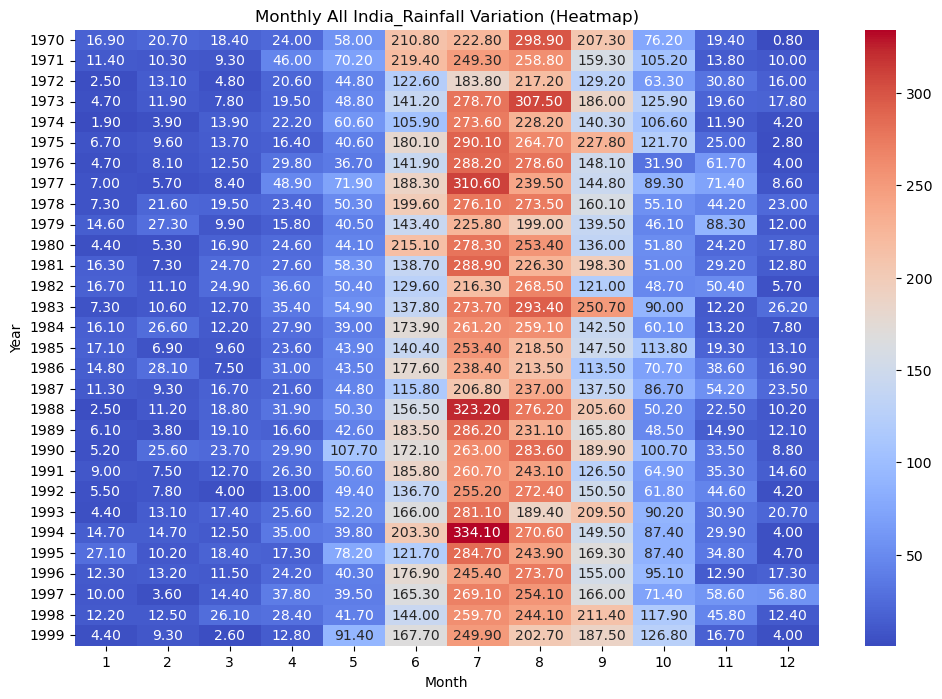

In [33]:
#Heatmap (Year × Month)
#This is basically a visual version of the table. Brightness/color shows All_India_Monthly_Rainfall_mm intensity. Very clear for seeing seasonal patterns.

plt.figure(figsize=(12,8))
sns.heatmap(India_Rainfall_monthly_pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Monthly All India_Rainfall Variation (Heatmap)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

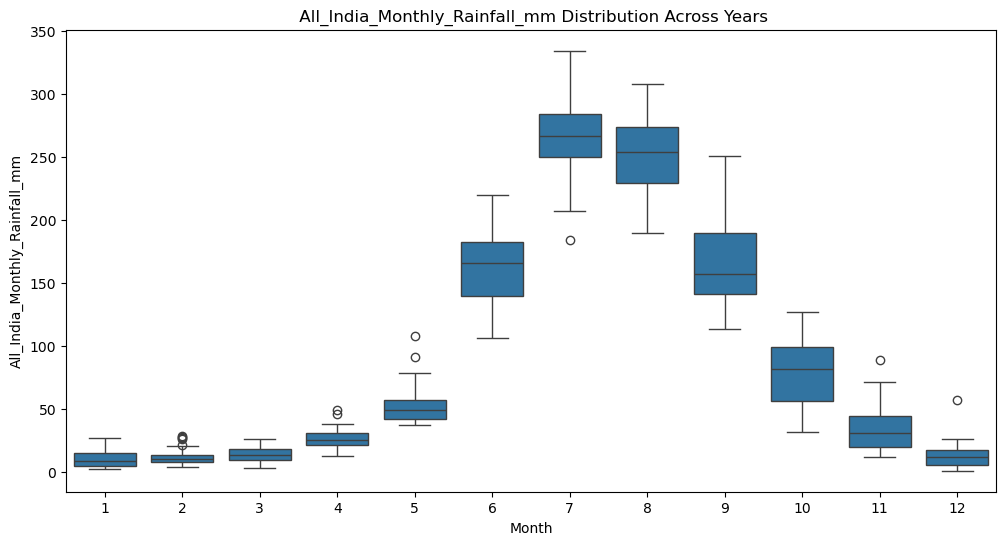

In [34]:
#Boxplot (Month-wise Distribution)
#to see All_India_Monthly_Rainfall_mm distribution for each month across all years, use a boxplot

plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='All_India_Monthly_Rainfall_mm', data=India_Rainfall_monthly)
plt.title(" All_India_Monthly_Rainfall_mm Distribution Across Years")
plt.xlabel("Month")
plt.ylabel("All_India_Monthly_Rainfall_mm")
plt.show()

#Each box shows median, quartiles, and outliers for that month across years.
#Helps identify which months have high/low All_India_Monthly_Rainfall_mm generally.

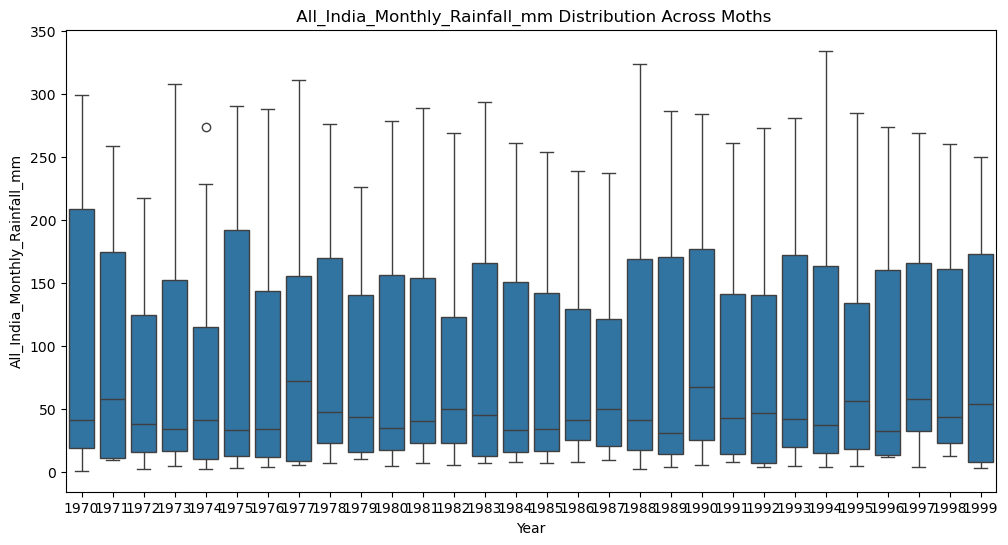

    Year  Month  All_India_Monthly_Rainfall_mm  YearMonth
0   1970      1                           16.9 1970-01-01
31  1970      2                           20.7 1970-02-01


In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Year', y='All_India_Monthly_Rainfall_mm', data=India_Rainfall_monthly)
plt.title(" All_India_Monthly_Rainfall_mm Distribution Across Moths")
plt.xlabel("Year")
plt.ylabel("All_India_Monthly_Rainfall_mm")
plt.show()
print(India_Rainfall_monthly.head(2))

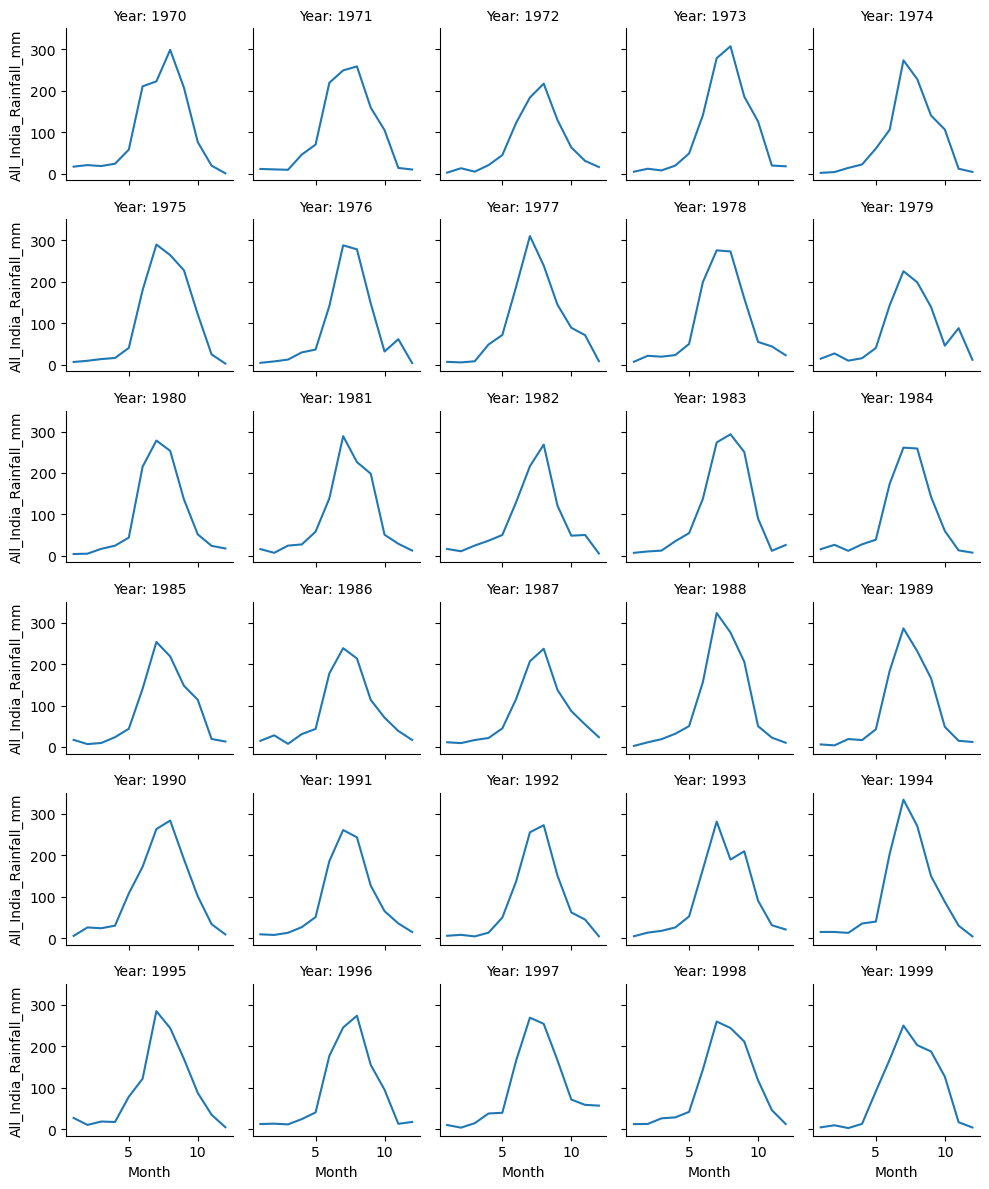

In [36]:
#FacetGrid / Small Multiples
#one subplot per year with 12 points (months).  lines for each year separately.
g = sns.FacetGrid(India_Rainfall_monthly, col="Year", col_wrap=5, height=2)
g.map(plt.plot, "Month", "All_India_Monthly_Rainfall_mm")
g.set_titles("Year: {col_name}")
g.set_axis_labels("Month", "All_India_Rainfall_mm")
plt.show()

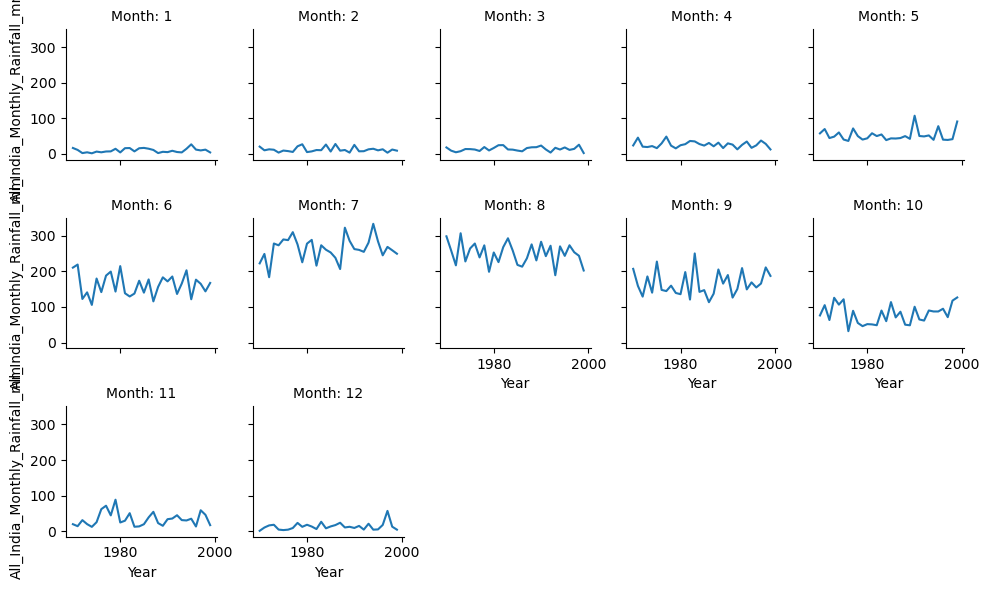

In [37]:
g = sns.FacetGrid(India_Rainfall_monthly, col="Month", col_wrap=5, height=2)
g.map(plt.plot, "Year", "All_India_Monthly_Rainfall_mm")
g.set_titles("Month: {col_name}")
g.set_axis_labels("Year", "All_India_Monthly_Rainfall_mm")
plt.show()

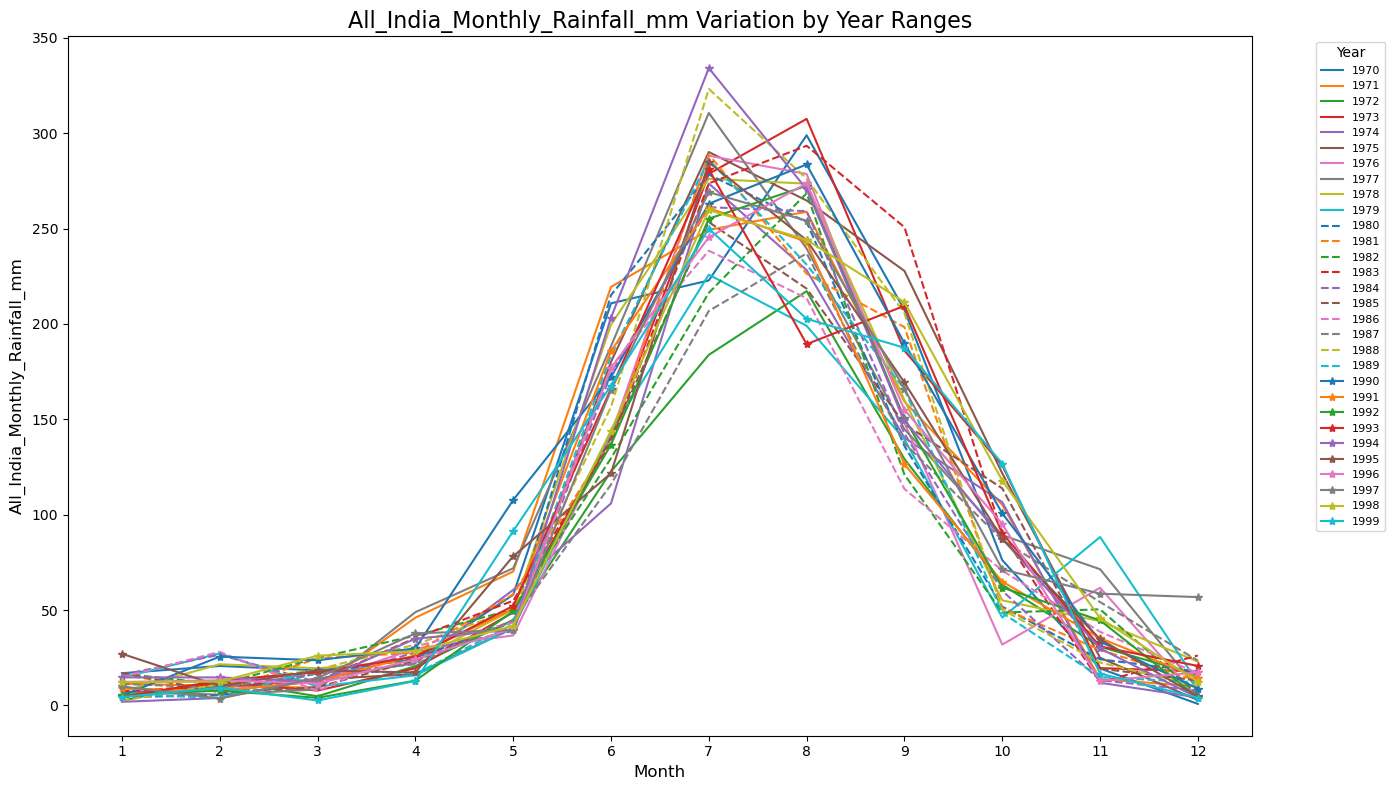

In [38]:
#group years into ranges and use different line styles
plt.figure(figsize=(14,8))

# Loop through each year and assign line style based on year range
for year in India_Rainfall_monthly_pivot.index:
    if 1970 <= year < 1980:
        style = '-'        # solid line
    elif 1980 <= year < 1990:
        style = '--'       # dashed line
    elif 1990 <= year < 2000:
        style = '*-'       # star markers with line
    else:
        style = ':'        # dotted line for other years

    plt.plot(India_Rainfall_monthly_pivot.columns, India_Rainfall_monthly_pivot.loc[year], style, label=str(year))

plt.title("All_India_Monthly_Rainfall_mm Variation by Year Ranges", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("All_India_Monthly_Rainfall_mm", fontsize=12)
plt.xticks(India_Rainfall_monthly_pivot.columns)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, ncol=1)
plt.tight_layout()
plt.show()

In [40]:
dmi_ts = dmi_monthly.set_index('YearMonth')['DMI']
dmi_ts = dmi_ts.asfreq('MS')  # Monthly Start frequency
dmi_ts

YearMonth
1970-01-01    0.297
1970-02-01    0.326
1970-03-01    0.068
1970-04-01    0.219
1970-05-01    0.182
              ...  
1999-08-01    0.023
1999-09-01   -0.050
1999-10-01   -0.190
1999-11-01   -0.116
1999-12-01   -0.148
Freq: MS, Name: DMI, Length: 360, dtype: float64

In [41]:
rain_ts = (
    df[['Year', 'Month', 'All_India_Monthly_Rainfall_mm']]
    .drop_duplicates()
)

rain_ts['YearMonth'] = pd.to_datetime(
    rain_ts['Year'].astype(str) + '-' +
    rain_ts['Month'].astype(str) + '-01'
)

rain_ts = rain_ts.set_index('YearMonth')['All_India_Monthly_Rainfall_mm']
rain_ts = rain_ts.asfreq('MS')


<p>Interpretation</p>
<p>Clear differences across months → seasonality exists</p>
<p>Similar boxes → weak/no seasonality</p>

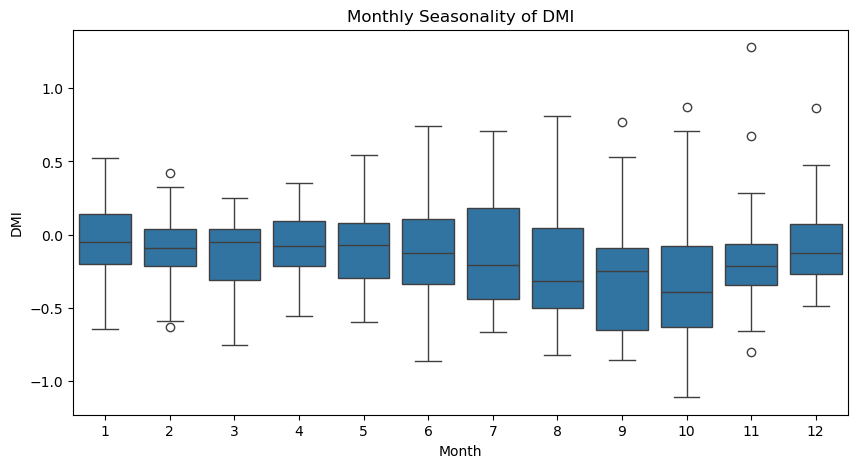

In [42]:
#DMI seasonality
dmi_df = dmi_ts.reset_index()
dmi_df['Month'] = dmi_df['YearMonth'].dt.month

plt.figure(figsize=(10,5))
sns.boxplot(x='Month', y='DMI', data=dmi_df)
plt.title("Monthly Seasonality of DMI")
plt.show()


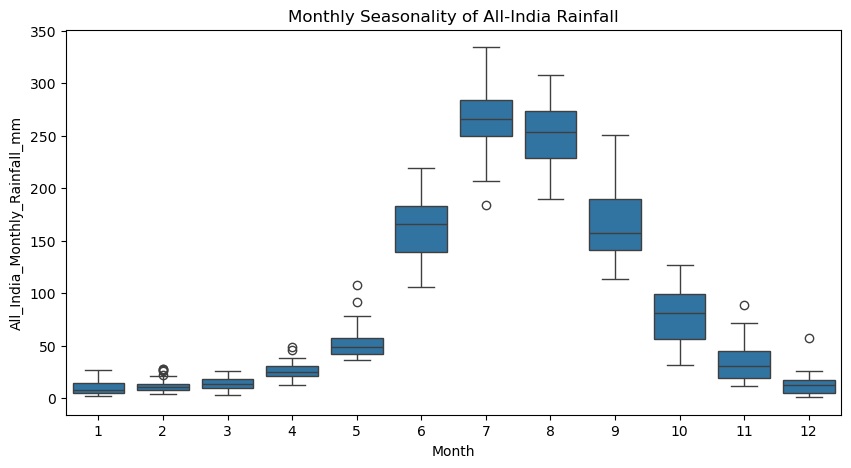

In [43]:
#Rainfall seasonality
rain_df = rain_ts.reset_index()
rain_df['Month'] = rain_df['YearMonth'].dt.month

plt.figure(figsize=(10,5))
sns.boxplot(x='Month', y='All_India_Monthly_Rainfall_mm', data=rain_df)
plt.title("Monthly Seasonality of All-India Rainfall")
plt.show()


<p>DMI decomposition</p>

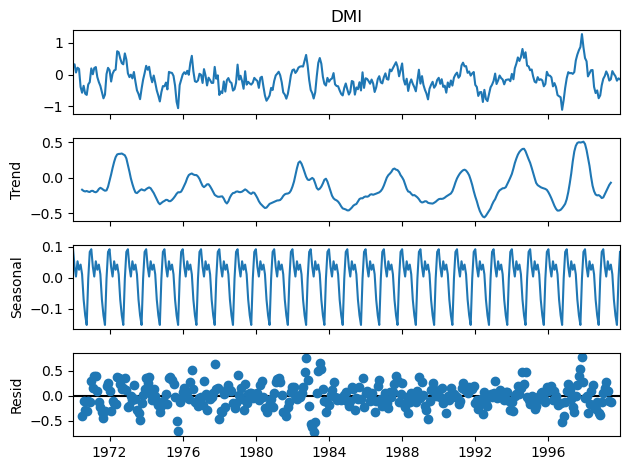

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp_dmi = seasonal_decompose(dmi_ts, model='additive', period=12)
decomp_dmi.plot()
plt.show()


<p>Rainfall decomposition</p>

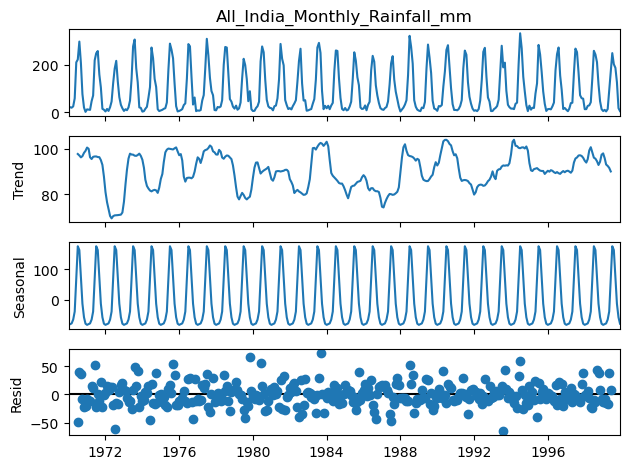

In [45]:
decomp_rain = seasonal_decompose(rain_ts, model='additive', period=12)
decomp_rain.plot()
plt.show()


<p>Interpretation</p>
<p>Seasonal component repeating → seasonality</p>
<p>Smooth trend → long-term change</p>
<p>Residuals → randomness</p>

<h1>What is ACF?</h1>

<h2>Autocorrelation Function</h2>

<p>Correlation between the series and its past values

<p>Example:

<p>Big spike at lag 12 → annual seasonality

<p>Slow decay → trend / persistence

<h1>What is PACF?</h1>

<h2>Partial autocorrelation</h2>

<p>Direct correlation after removing intermediate lags
(used more in AR models, but good for understanding structure)</p>

<Figure size 1200x400 with 0 Axes>

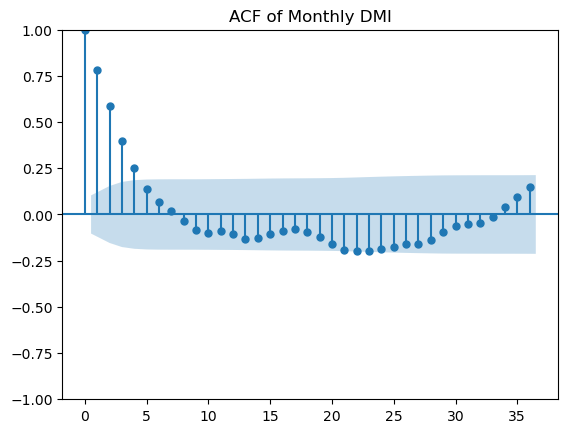

<Figure size 1200x400 with 0 Axes>

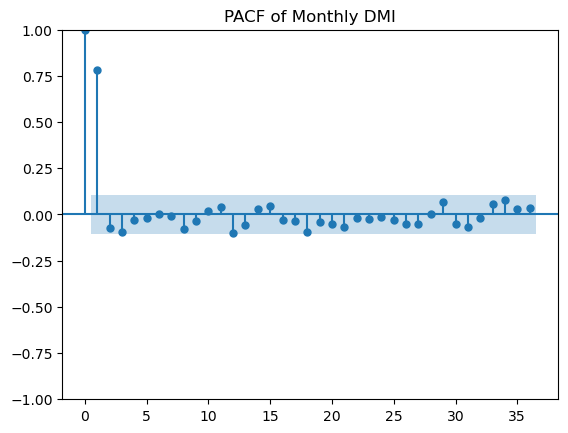

In [155]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,4))
plot_acf(dmi_ts.dropna(), lags=36)
plt.title("ACF of Monthly DMI")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(dmi_ts.dropna(), lags=36, method='ywm')
plt.title("PACF of Monthly DMI")
plt.show()


<Figure size 1200x400 with 0 Axes>

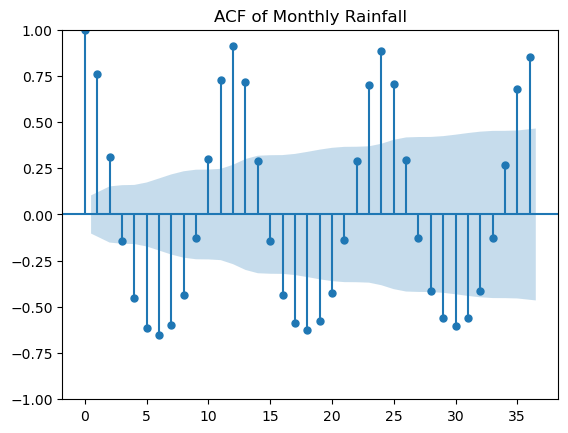

<Figure size 1200x400 with 0 Axes>

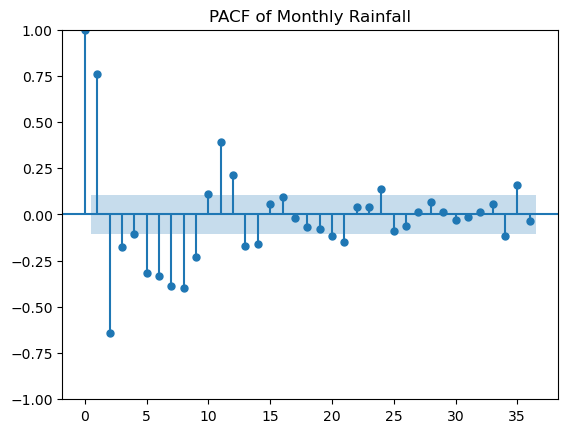

In [156]:
plt.figure(figsize=(12,4))
plot_acf(rain_ts.dropna(), lags=36)
plt.title("ACF of Monthly Rainfall")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(rain_ts.dropna(), lags=36, method='ywm')
plt.title("PACF of Monthly Rainfall")
plt.show()


<h1>How to READ ACF/PACF (exam-friendly)</h1>
<h1>ACF</h1>

Spike at lag 12, 24, 36 → seasonality

Gradual decay → trend

Quick cutoff → stationary

<h1>PACF</h1>

Sharp cutoff after lag k → AR(k) behavior

<h1>Hypothesis testing for seasonality (formal)</h1>
<p>H₀: Monthly means are equal (no seasonality)</p>
<p>H₁: At least one month differs</p>
<p>One-way ANOVA (month as factor)</p>

In [49]:
#DMI
from scipy.stats import f_oneway

groups = [
    dmi_df[dmi_df['Month'] == m]['DMI']
    for m in range(1,13)
]

f_stat, p_value = f_oneway(*groups)
print("DMI seasonality ANOVA p-value:", p_value)

#p ≥ 0.05 → no strong monthly effect

DMI seasonality ANOVA p-value: 0.15116727419946643


In [51]:
##Rainfall
groups = [
    rain_df[rain_df['Month'] == m]['All_India_Monthly_Rainfall_mm']
    for m in range(1,13)
]

f_stat, p_value = f_oneway(*groups)
print("Rainfall seasonality ANOVA p-value:", p_value)

#p < 0.05 → significant seasonality


Rainfall seasonality ANOVA p-value: 3.1679928631431635e-214


<h1>What can write in report</h1>Monthly DMI and All-India rainfall series were analyzed for temporal structure.
Visual inspection, seasonal decomposition, and ACF plots revealed clear annual seasonality (lag 12).
One-way ANOVA confirmed statistically significant monthly variation (p < 0.05).

In [52]:
df1 = pd.read_csv("dry_zone_stations.csv")
df.head(2)

Station_Name  Latitude  Longitude  Elevation      Date  Year  \
0  ANURADHAPURA (METEO)      8.33      80.38       92.5  1/1/1970  1970   
1  ANURADHAPURA (METEO)      8.33      80.38       92.5  1/2/1970  1970   

   Month  Day  Precipitation_mm Flag  Nino3.4_SST    DMI  \
0      1    1               6.8  NaN    27.095648  0.297   
1      1    2               2.7  NaN    27.095648  0.297   

   Southern Oscillation Index  Sunspot_Number  U_Wind_850_Mean  \
0                      -1.256             163        -3.855421   
1                      -1.256             118        -4.491479   

   All_India_Monthly_Rainfall_mm  
0                           16.9  
1                           16.9

In [57]:
# Make sure Date is datetime
'''1970/1/1 – 1979/12/31 → 1970s

1980/1/1 – 1989/12/31 → 1980s

1990/1/1 – 1999/12/30 → 1990s'''


df['Date'] = pd.to_datetime(df['Date'])

# Create Decade column
df['Decade'] = pd.cut(
    df['Year'],
    bins=[1969, 1979, 1989, 1999],
    labels=['1970s', '1980s', '1990s']
)

df[['Year', 'Decade']].drop_duplicates().head()


Year Decade
0     1970  1970s
365   1971  1970s
730   1972  1970s
1096  1973  1970s
1461  1974  1970s

In [113]:
stations_1970s = [
    'ANURADHAPURA (METEO)', 'JAFFNA', 'KANKESANTURAI',
    'MANNAR', 'PUTTALAM', 'TRINCOMALEE', 'VAVUNIYA'
]

stations_1980s = [
    'ANURADHAPURA (METEO)', 'JAFFNA', 'KANKESANTURAI',
    'MANNAR', 'MULLAITIVU', 'PUTTALAM',
    'TRINCOMALEE', 'VAVUNIYA'
]

stations_1990s = [
    'ANURADHAPURA (METEO)', 'BATTICALOA', 'GALLE',
    'HAMBANTOTA', 'KATUGASTOTA', 'MANNAR',
    'PUTTALAM', 'RATNAPURA', 'TRINCOMALEE',
    'VAVUNIYA'
]


In [114]:
df['Station_Name'].unique()


array(['ANURADHAPURA (METEO)', 'BATTICALOA', 'GALLE', 'HAMBANTOTA',
       'JAFFNA', 'KATUGASTOTA', 'KANKESANTURAI', 'MANNAR', 'MULLAITIVU',
       'PUTTALAM', 'RATNAPURA', 'TRINCOMALEE', 'VAVUNIYA'], dtype=object)

In [115]:
df['Date'] = pd.to_datetime(df['Date'])

df['Decade'] = pd.cut(
    df['Year'],
    bins=[1969, 1979, 1989, 1999],
    labels=['1970s', '1980s', '1990s']
)


In [116]:
df_1970s = df[
    (df['Decade'] == '1970s') &
    (df['Station_Name'].isin(stations_1970s))
].copy()

df_1980s = df[
    (df['Decade'] == '1980s') &
    (df['Station_Name'].isin(stations_1980s))
].copy()

df_1990s = df[
    (df['Decade'] == '1990s') &
    (df['Station_Name'].isin(stations_1990s))
].copy()



In [117]:
df_1970s['Station_Name'].unique()


array(['ANURADHAPURA (METEO)', 'JAFFNA', 'KANKESANTURAI', 'MANNAR',
       'PUTTALAM', 'TRINCOMALEE', 'VAVUNIYA'], dtype=object)

In [118]:
df_1980s['Station_Name'].unique()


array(['ANURADHAPURA (METEO)', 'JAFFNA', 'KANKESANTURAI', 'MANNAR',
       'MULLAITIVU', 'PUTTALAM', 'TRINCOMALEE', 'VAVUNIYA'], dtype=object)

In [122]:
df_1990s['Station_Name'].unique()


array(['ANURADHAPURA (METEO)', 'BATTICALOA', 'GALLE', 'HAMBANTOTA',
       'KATUGASTOTA', 'MANNAR', 'PUTTALAM', 'RATNAPURA', 'TRINCOMALEE',
       'VAVUNIYA'], dtype=object)

In [123]:
df_1970s.shape

(25564, 17)

In [124]:
df_1980s.shape

(28402, 17)

In [126]:
df_1990s.shape

(34283, 17)

In [127]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
for d in [df_1970s, df_1980s, df_1990s]:
    d['Rain_log'] = np.log1p(d['Precipitation_mm'])


In [128]:
df_1970s[['Precipitation_mm', 'Rain_log']].head()


Precipitation_mm  Rain_log
0               6.8  2.054124
1               2.7  1.308333
2               0.0  0.000000
3               0.0  0.000000
4               0.0  0.000000

In [129]:
import statsmodels.formula.api as smf

model_1970s = smf.ols(
    "Rain_log ~ DMI + All_India_Monthly_Rainfall_mm + C(Station_Name)",
    data=df_1970s
).fit()

print(model_1970s.summary())


                            OLS Regression Results                            
Dep. Variable:               Rain_log   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     84.08
Date:                Sat, 31 Jan 2026   Prob (F-statistic):          3.93e-138
Time:                        15:17:44   Log-Likelihood:                -37113.
No. Observations:               25564   AIC:                         7.424e+04
Df Residuals:                   25555   BIC:                         7.432e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [131]:

from scipy.stats import pearsonr


Correlation test (Hypothesis Test)
Pearson correlation

<p>Null hypothesis: H0: no correlation between X and Sri Lankan rainfall</p>
<p>Alternative hypothesis: H1: X affects Sri Lankan rainfall</p>

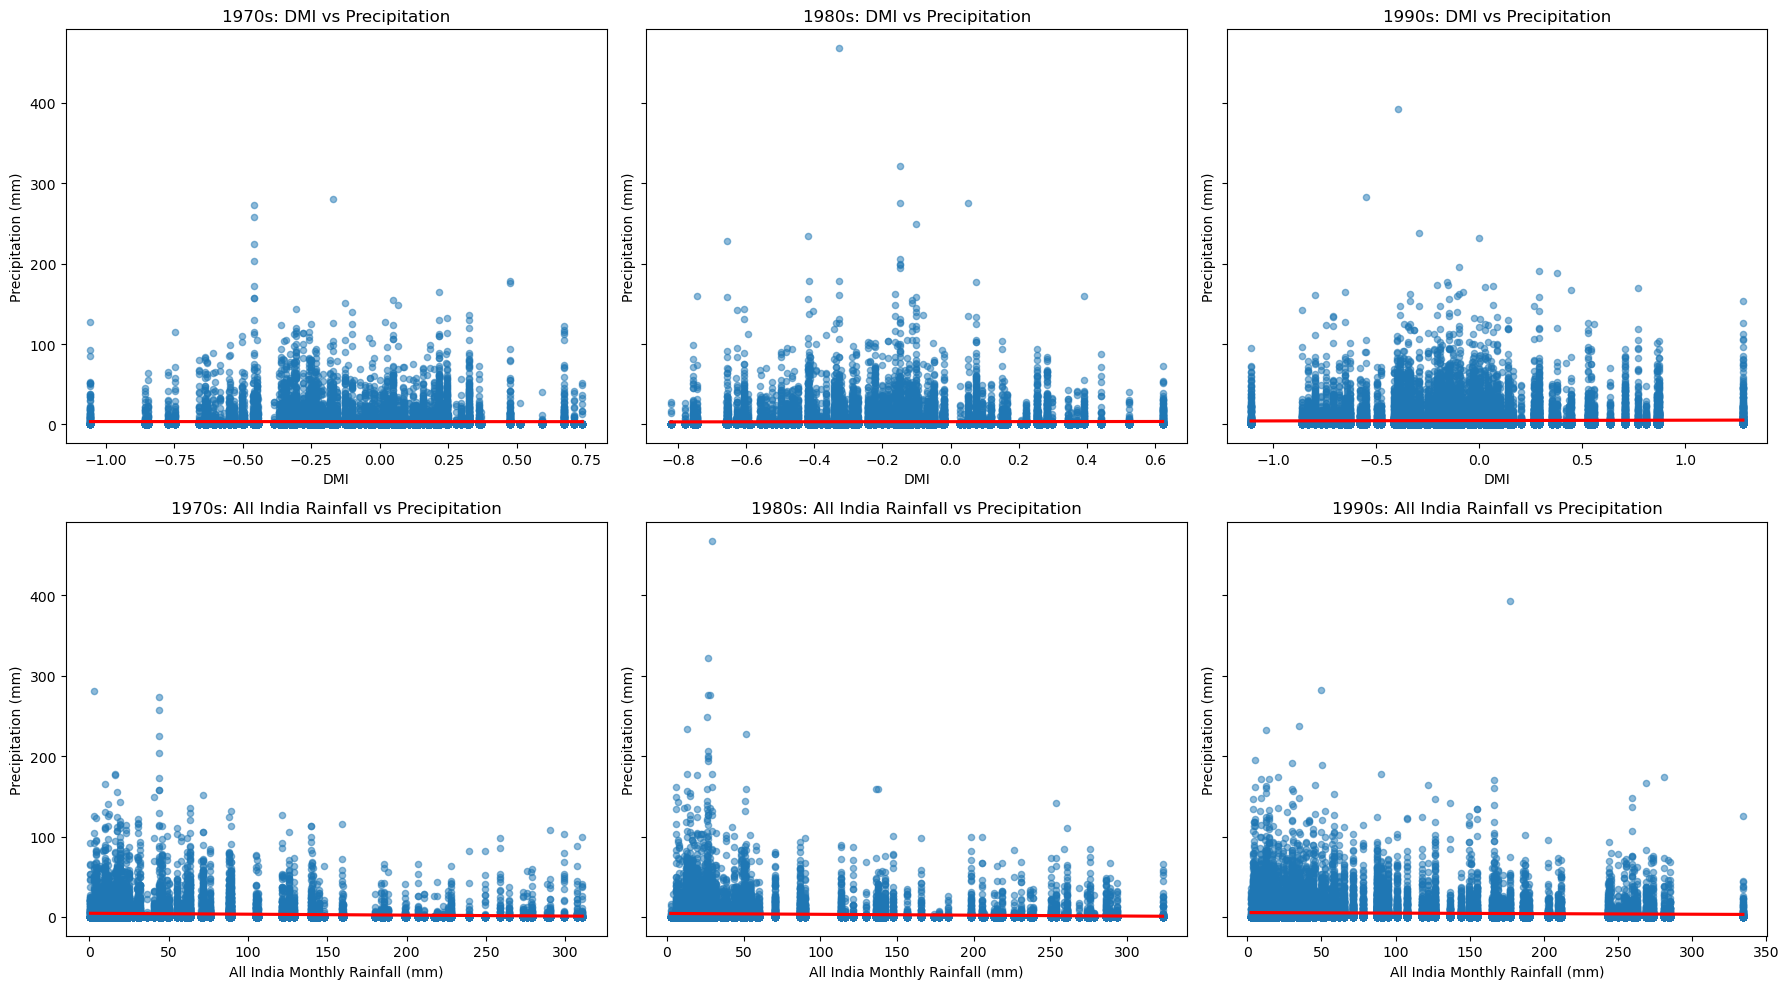

Correlation Results:
--- 1970s ---
DMI vs Precipitation: r = -0.002, p = 8.055e-01
All India Rainfall vs Precipitation: r = -0.090, p = 1.852e-47

--- 1980s ---
DMI vs Precipitation: r = 0.008, p = 1.577e-01
All India Rainfall vs Precipitation: r = -0.081, p = 1.964e-42

--- 1990s ---
DMI vs Precipitation: r = 0.013, p = 1.696e-02
All India Rainfall vs Precipitation: r = -0.047, p = 1.842e-18



In [132]:



decades = {'1970s': df_1970s, '1980s': df_1980s, '1990s': df_1990s}

# --- Create figure with 2 rows x 3 columns ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

# --- Plot DMI vs Precipitation (top row) ---
for ax, (name, df_dec) in zip(axes[0], decades.items()):
    sns.regplot(
        x='DMI',
        y='Precipitation_mm',
        data=df_dec,
        ax=ax,
        scatter_kws={'s':20, 'alpha':0.5},  # remove 'c'
        line_kws={'color':'red'}
    )
    ax.set_title(f'{name}: DMI vs Precipitation')
    ax.set_xlabel('DMI')
    ax.set_ylabel('Precipitation (mm)')

# --- Plot All India Rainfall vs Precipitation (bottom row) ---
for ax, (name, df_dec) in zip(axes[1], decades.items()):
    sns.regplot(
        x='All_India_Monthly_Rainfall_mm',
        y='Precipitation_mm',
        data=df_dec,
        ax=ax,
        scatter_kws={'s':20, 'alpha':0.5},  # remove 'c'
        line_kws={'color':'red'}
    )
    ax.set_title(f'{name}: All India Rainfall vs Precipitation')
    ax.set_xlabel('All India Monthly Rainfall (mm)')
    ax.set_ylabel('Precipitation (mm)')

plt.tight_layout()
plt.show()

# --- Compute and print correlation coefficients ---
print("Correlation Results:")
for name, df_dec in decades.items():
    r_dmi, p_dmi = pearsonr(df_dec['DMI'], df_dec['Precipitation_mm'])
    r_ai, p_ai = pearsonr(df_dec['All_India_Monthly_Rainfall_mm'], df_dec['Precipitation_mm'])
    
    print(f'--- {name} ---')
    print(f'DMI vs Precipitation: r = {r_dmi:.3f}, p = {p_dmi:.3e}')
    print(f'All India Rainfall vs Precipitation: r = {r_ai:.3f}, p = {p_ai:.3e}\n')


<h1>Southern Oscillation Index and Nino3.4 SST</h1>

In [137]:
#STEP 1: Create a Year–Month Southern_Oscillation_Index_monthly series (NO daily noise)
#We will keep only one Southern_Oscillation_Index value per month.

Southern_Oscillation_Index_monthly = (
    df[['Year', 'Month', 'Southern Oscillation Index']]
    .drop_duplicates()
    .sort_values(['Year', 'Month'])
)
print(Southern_Oscillation_Index_monthly)
Southern_Oscillation_Index_monthly.shape

       Year  Month  Southern Oscillation Index
0      1970      1                      -1.256
31     1970      2                      -1.219
59     1970      3                       0.058
90     1970      4                      -0.562
120    1970      5                       0.038
...     ...    ...                         ...
10804  1999      8                      -0.029
10835  1999      9                      -0.072
10865  1999     10                       0.946
10896  1999     11                       1.221
10926  1999     12                       1.370

[360 rows x 3 columns]


(360, 3)

In [138]:
#STEP 2: Create a proper time variable (for clean plotting)

Southern_Oscillation_Index_monthly['YearMonth'] = pd.to_datetime(
    Southern_Oscillation_Index_monthly['Year'].astype(str) + '-' +
    Southern_Oscillation_Index_monthly['Month'].astype(str) + '-01'
)
Southern_Oscillation_Index_monthly

Year  Month  Southern Oscillation Index  YearMonth
0      1970      1                      -1.256 1970-01-01
31     1970      2                      -1.219 1970-02-01
59     1970      3                       0.058 1970-03-01
90     1970      4                      -0.562 1970-04-01
120    1970      5                       0.038 1970-05-01
...     ...    ...                         ...        ...
10804  1999      8                      -0.029 1999-08-01
10835  1999      9                      -0.072 1999-09-01
10865  1999     10                       0.946 1999-10-01
10896  1999     11                       1.221 1999-11-01
10926  1999     12                       1.370 1999-12-01

[360 rows x 4 columns]

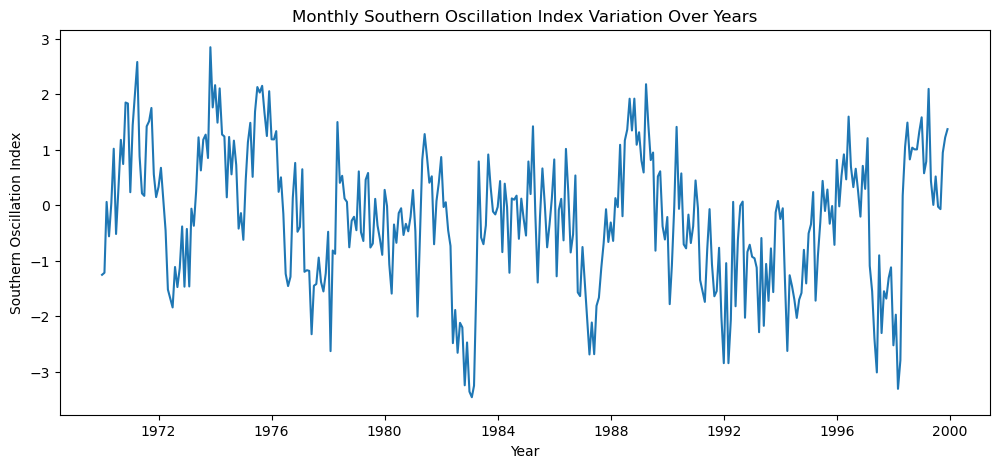

In [139]:
#STEP 3: 

plt.figure(figsize=(12,5))
plt.plot(Southern_Oscillation_Index_monthly['YearMonth'], Southern_Oscillation_Index_monthly['Southern Oscillation Index'])
plt.title("Monthly Southern Oscillation Index Variation Over Years")
plt.xlabel("Year")
plt.ylabel("Southern Oscillation Index")
plt.show()

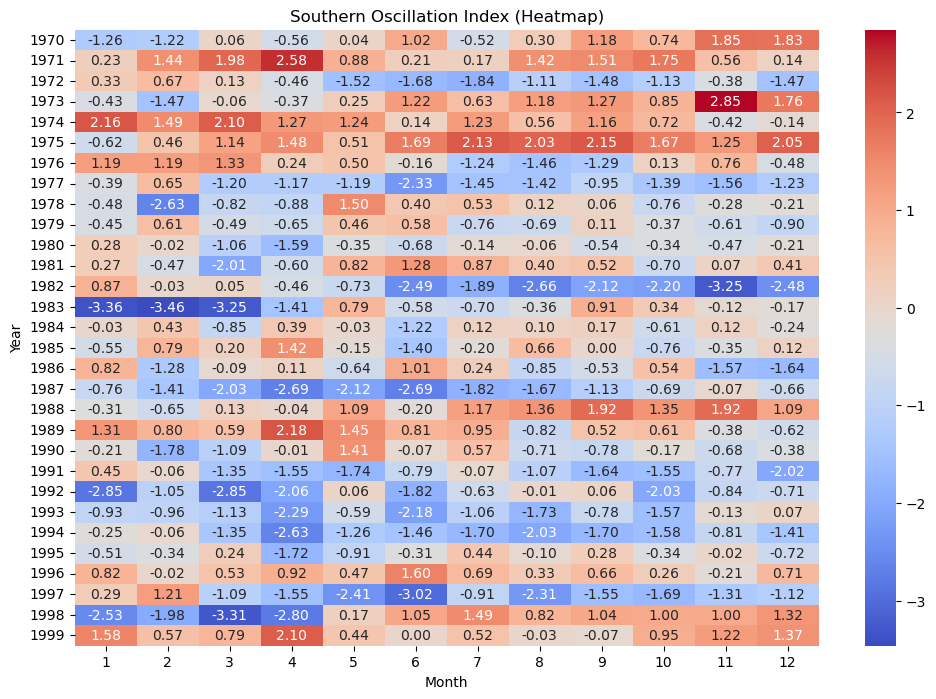

In [143]:

Southern_Oscillation_Index_pivot = Southern_Oscillation_Index_monthly.pivot(index='Year', columns='Month', values='Southern Oscillation Index')
plt.figure(figsize=(12,8))
sns.heatmap(Southern_Oscillation_Index_pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Southern Oscillation Index (Heatmap)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

In [157]:
#STEP 1: Create a Nino3.4_monthly series 
#We will keep only one Nino3.4 value per month.

Nino3_4_monthly = (
    df[['Year', 'Month', 'Nino3.4_SST']]
    .drop_duplicates()
    .sort_values(['Year', 'Month'])
)
print(Nino3_4_monthly)
Nino3_4_monthly.shape

       Year  Month  Nino3.4_SST
0      1970      1    27.095648
31     1970      2    27.091370
59     1970      3    27.499926
90     1970      4    27.928804
120    1970      5    27.845050
...     ...    ...          ...
10804  1999      8    25.858286
10835  1999      9    25.876610
10865  1999     10    25.664750
10896  1999     11    25.204388
10926  1999     12    25.013083

[360 rows x 3 columns]


(360, 3)

In [158]:
#STEP 2: Create a proper time variable (for clean plotting)

Nino3_4_monthly['YearMonth'] = pd.to_datetime(
    Nino3_4_monthly['Year'].astype(str) + '-' +
    Nino3_4_monthly['Month'].astype(str) + '-01'
)
Nino3_4_monthly

Year  Month  Nino3.4_SST  YearMonth
0      1970      1    27.095648 1970-01-01
31     1970      2    27.091370 1970-02-01
59     1970      3    27.499926 1970-03-01
90     1970      4    27.928804 1970-04-01
120    1970      5    27.845050 1970-05-01
...     ...    ...          ...        ...
10804  1999      8    25.858286 1999-08-01
10835  1999      9    25.876610 1999-09-01
10865  1999     10    25.664750 1999-10-01
10896  1999     11    25.204388 1999-11-01
10926  1999     12    25.013083 1999-12-01

[360 rows x 4 columns]

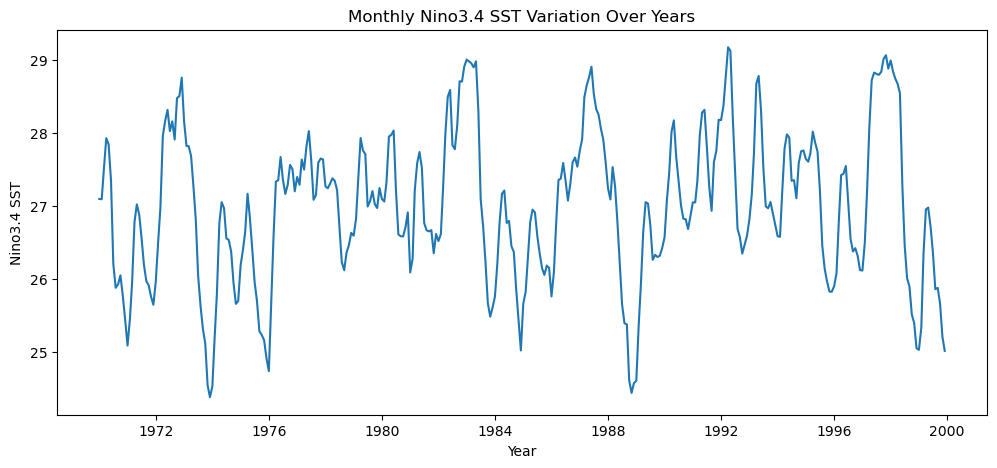

In [161]:
#STEP 3: 

plt.figure(figsize=(12,5))
plt.plot(Nino3_4_monthly['YearMonth'], Nino3_4_monthly['Nino3.4_SST'])
plt.title("Monthly Nino3.4 SST Variation Over Years")
plt.xlabel("Year")
plt.ylabel("Nino3.4 SST")
plt.show()

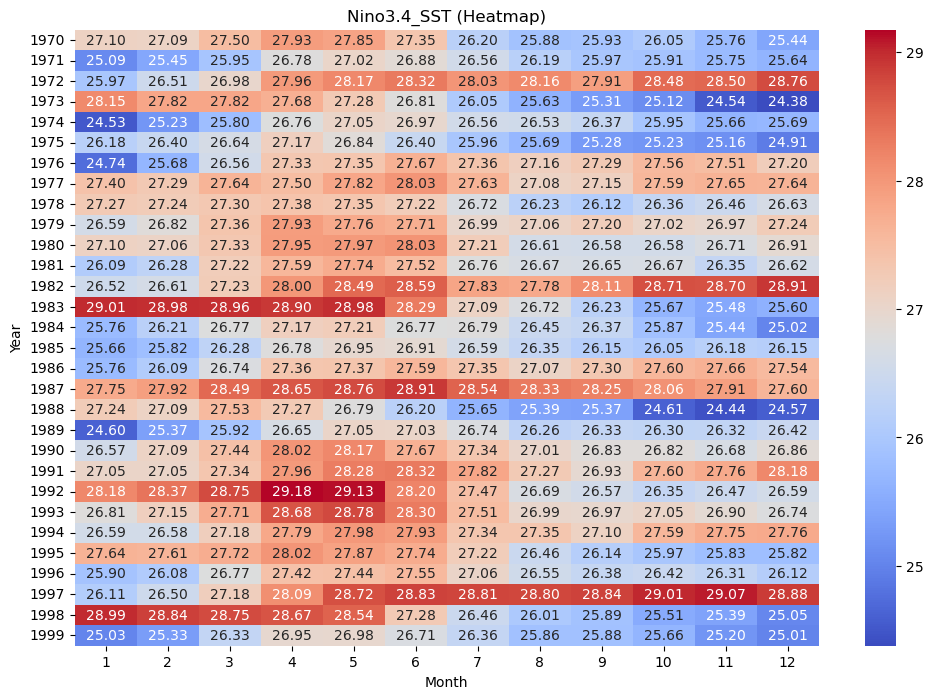

In [160]:

Nino3_4_SST_pivot = Nino3_4_monthly.pivot(index='Year', columns='Month', values='Nino3.4_SST')
plt.figure(figsize=(12,8))
sns.heatmap(Nino3_4_SST_pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Nino3.4_SST (Heatmap)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

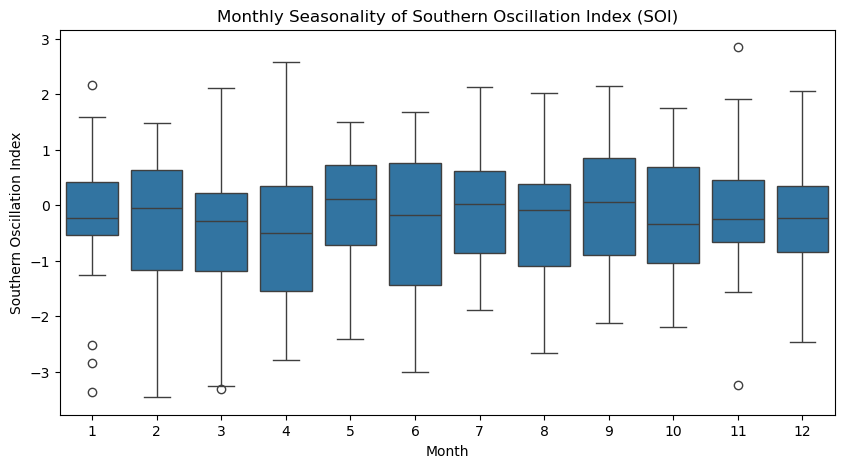

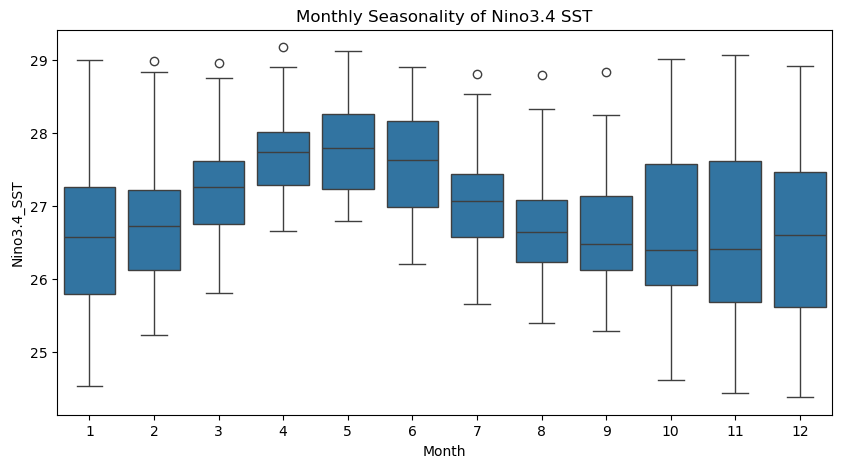

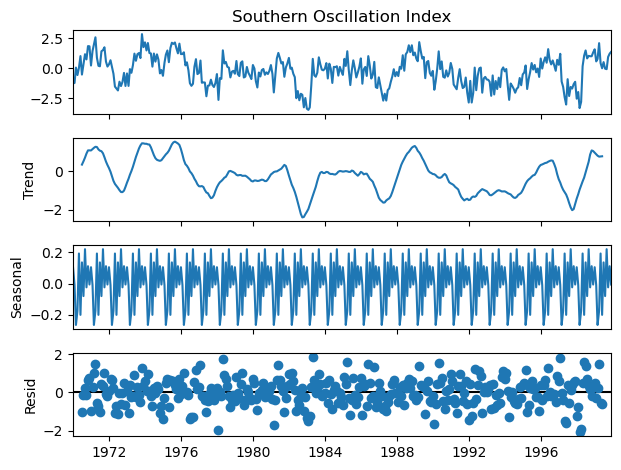

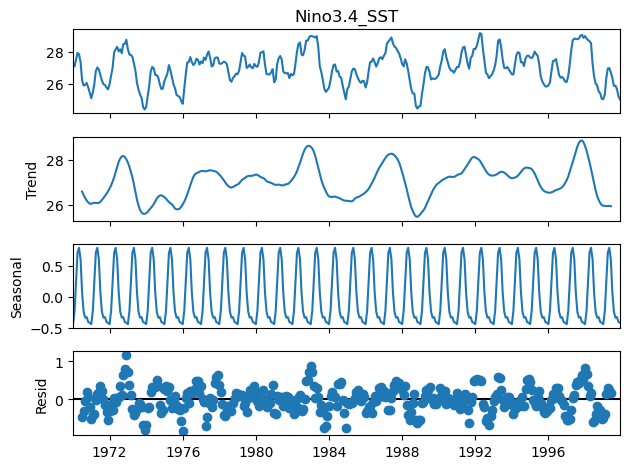

<Figure size 1200x400 with 0 Axes>

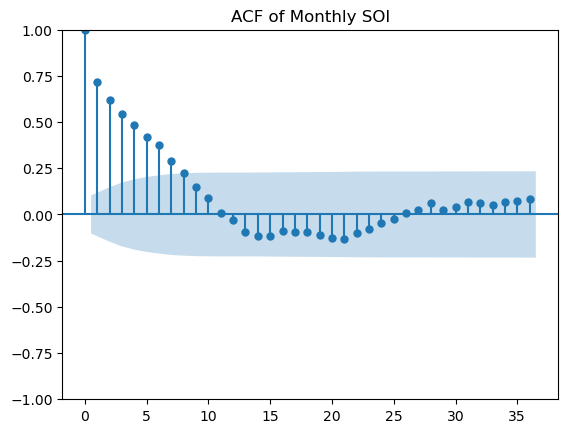

<Figure size 1200x400 with 0 Axes>

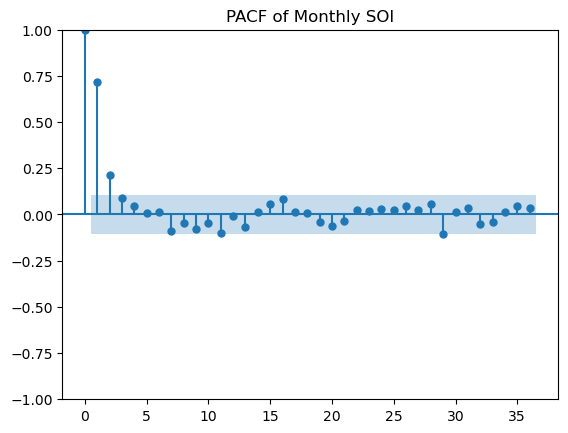

<Figure size 1200x400 with 0 Axes>

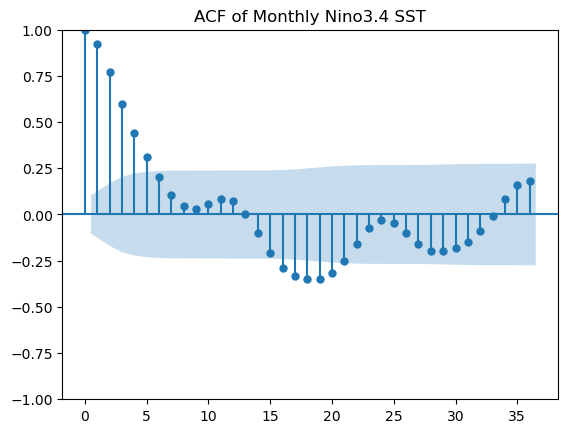

<Figure size 1200x400 with 0 Axes>

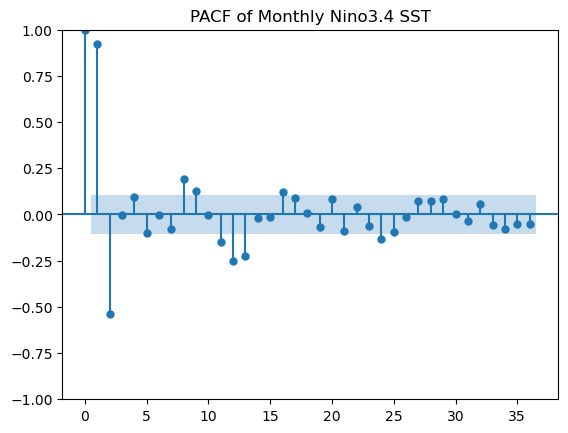

SOI monthly seasonality ANOVA p-value: 0.9204490144436566
Nino3.4 SST monthly seasonality ANOVA p-value: 6.107486286387929e-12


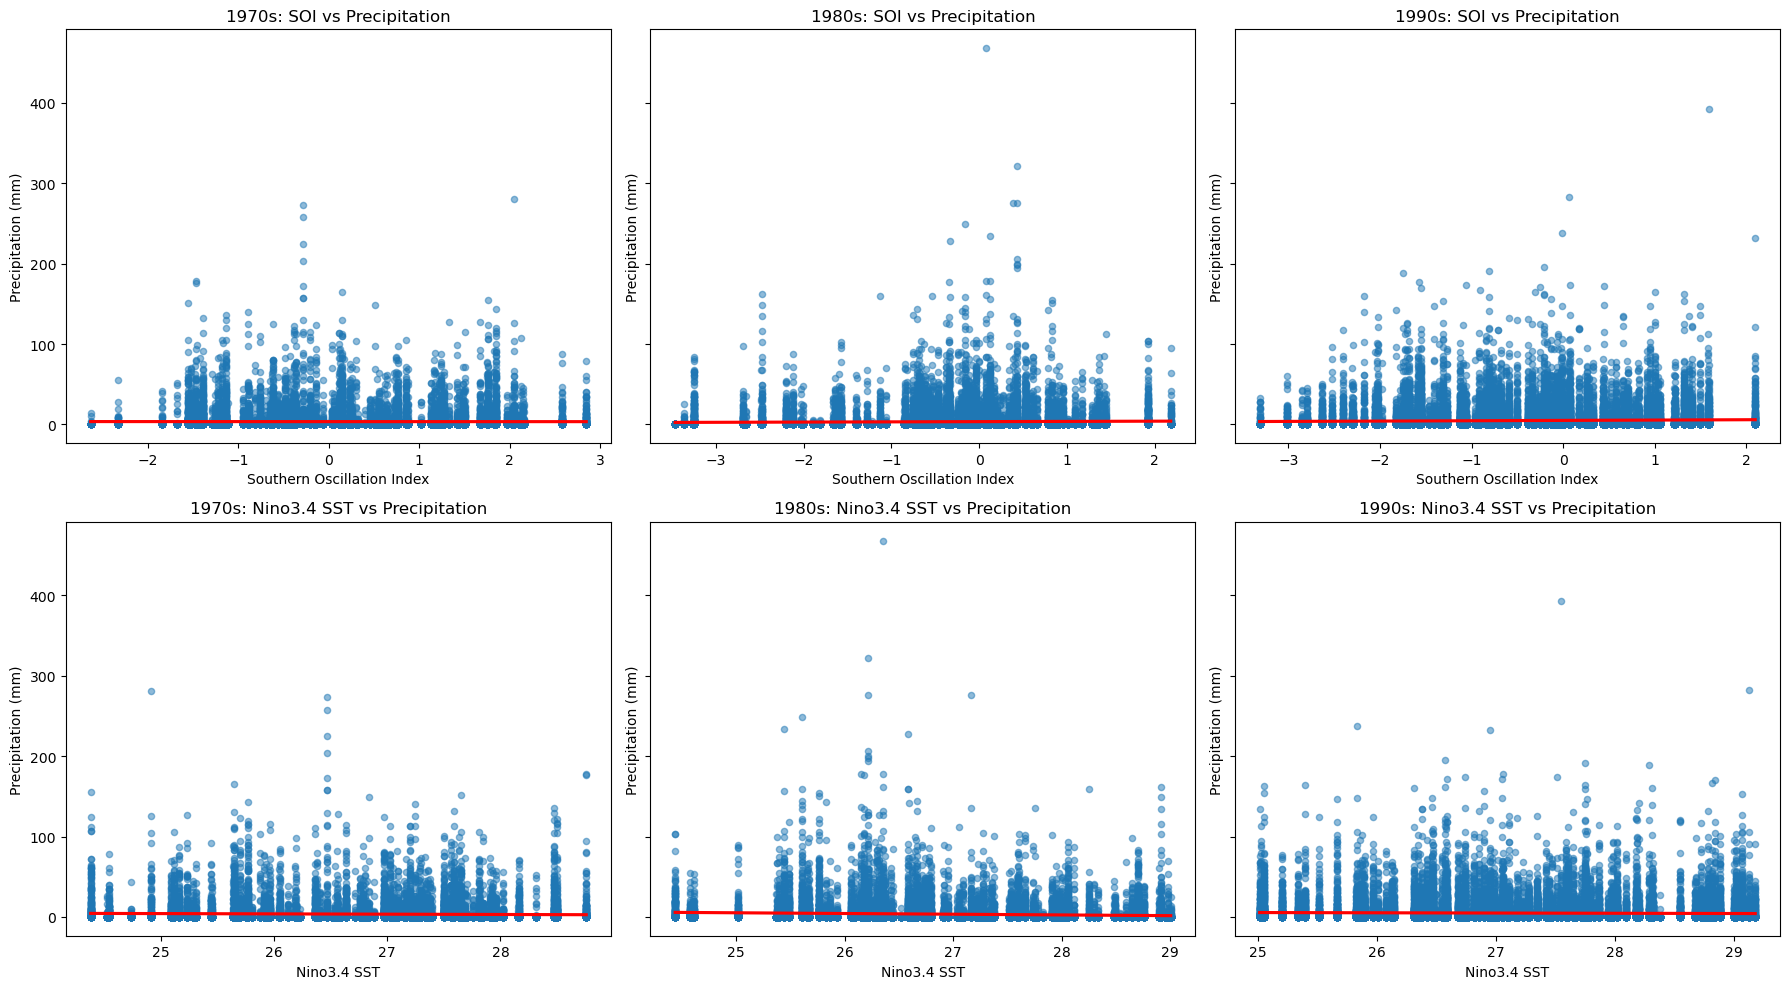

Correlation Results:
--- 1970s ---
SOI vs Precipitation: r=-0.002, p=8.074e-01
Nino3.4 SST vs Precipitation: r=-0.029, p=2.879e-06

--- 1980s ---
SOI vs Precipitation: r=0.027, p=7.524e-06
Nino3.4 SST vs Precipitation: r=-0.076, p=1.241e-37

--- 1990s ---
SOI vs Precipitation: r=0.036, p=1.563e-11
Nino3.4 SST vs Precipitation: r=-0.023, p=2.839e-05



In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import f_oneway, pearsonr

# --- Prepare monthly series for Southern Oscillation Index (SOI) ---
soi_ts = df[['Year','Month','Southern Oscillation Index']].drop_duplicates()
soi_ts['YearMonth'] = pd.to_datetime(soi_ts['Year'].astype(str)+'-'+soi_ts['Month'].astype(str)+'-01')
soi_ts = soi_ts.set_index('YearMonth')['Southern Oscillation Index'].asfreq('MS')

# --- Prepare monthly series for Nino3.4 SST ---
nino_ts = df[['Year','Month','Nino3.4_SST']].drop_duplicates()
nino_ts['YearMonth'] = pd.to_datetime(nino_ts['Year'].astype(str)+'-'+nino_ts['Month'].astype(str)+'-01')
nino_ts = nino_ts.set_index('YearMonth')['Nino3.4_SST'].asfreq('MS')

# --- Seasonality boxplots ---
# SOI
soi_df = soi_ts.reset_index()
soi_df['Month'] = soi_df['YearMonth'].dt.month
plt.figure(figsize=(10,5))
sns.boxplot(x='Month', y='Southern Oscillation Index', data=soi_df)
plt.title("Monthly Seasonality of Southern Oscillation Index (SOI)")
plt.show()

# Nino3.4 SST
nino_df = nino_ts.reset_index()
nino_df['Month'] = nino_df['YearMonth'].dt.month
plt.figure(figsize=(10,5))
sns.boxplot(x='Month', y='Nino3.4_SST', data=nino_df)
plt.title("Monthly Seasonality of Nino3.4 SST")
plt.show()

# --- Decomposition ---
decomp_soi = seasonal_decompose(soi_ts, model='additive', period=12)
decomp_soi.plot()
plt.show()

decomp_nino = seasonal_decompose(nino_ts, model='additive', period=12)
decomp_nino.plot()
plt.show()

# --- ACF / PACF ---
plt.figure(figsize=(12,4))
plot_acf(soi_ts.dropna(), lags=36)
plt.title("ACF of Monthly SOI")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(soi_ts.dropna(), lags=36, method='ywm')
plt.title("PACF of Monthly SOI")
plt.show()

plt.figure(figsize=(12,4))
plot_acf(nino_ts.dropna(), lags=36)
plt.title("ACF of Monthly Nino3.4 SST")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(nino_ts.dropna(), lags=36, method='ywm')
plt.title("PACF of Monthly Nino3.4 SST")
plt.show()

# --- ANOVA for monthly seasonality ---
groups_soi = [soi_df[soi_df['Month']==m]['Southern Oscillation Index'] for m in range(1,13)]
f_stat, p_val = f_oneway(*groups_soi)
print("SOI monthly seasonality ANOVA p-value:", p_val)

groups_nino = [nino_df[nino_df['Month']==m]['Nino3.4_SST'] for m in range(1,13)]
f_stat, p_val = f_oneway(*groups_nino)
print("Nino3.4 SST monthly seasonality ANOVA p-value:", p_val)

# --- Regression with Sri Lankan rainfall per decade ---
decades = {'1970s': df_1970s, '1980s': df_1980s, '1990s': df_1990s}

fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

# Top row: SOI vs Precipitation
for ax, (name, df_dec) in zip(axes[0], decades.items()):
    sns.regplot(
        x='Southern Oscillation Index',
        y='Precipitation_mm',
        data=df_dec,
        ax=ax,
        scatter_kws={'s':20,'alpha':0.5},
        line_kws={'color':'red'}
    )
    ax.set_title(f'{name}: SOI vs Precipitation')
    ax.set_xlabel('Southern Oscillation Index')
    ax.set_ylabel('Precipitation (mm)')

# Bottom row: Nino3.4 SST vs Precipitation
for ax, (name, df_dec) in zip(axes[1], decades.items()):
    sns.regplot(
        x='Nino3.4_SST',
        y='Precipitation_mm',
        data=df_dec,
        ax=ax,
        scatter_kws={'s':20,'alpha':0.5},
        line_kws={'color':'red'}
    )
    ax.set_title(f'{name}: Nino3.4 SST vs Precipitation')
    ax.set_xlabel('Nino3.4 SST')
    ax.set_ylabel('Precipitation (mm)')

plt.tight_layout()
plt.show()

# Correlation results
print("Correlation Results:")
for name, df_dec in decades.items():
    r_soi, p_soi = pearsonr(df_dec['Southern Oscillation Index'], df_dec['Precipitation_mm'])
    r_nino, p_nino = pearsonr(df_dec['Nino3.4_SST'], df_dec['Precipitation_mm'])
    print(f'--- {name} ---')
    print(f'SOI vs Precipitation: r={r_soi:.3f}, p={p_soi:.3e}')
    print(f'Nino3.4 SST vs Precipitation: r={r_nino:.3f}, p={p_nino:.3e}\n')

